### explore returns, make charts

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import boto3
from botocore.client import Config
import os
import pandas as pd
from io import StringIO
import matplotlib.dates as dates
from datetime import datetime
import matplotlib.ticker as ticker
from random import shuffle
from time import time
from pandas.plotting import register_matplotlib_converters
%matplotlib notebook

os.chdir('C:\\Users\\A Sua\\Documents\\AWS\\credentials')
list_of_lines = []
with open('capstoner_key.txt') as fp:
    lines = fp.readlines()
    for line in lines:
        line = line.strip()
        list_of_lines.append(line)
    fp.close()


location = list_of_lines[0].split('=')[1]
AWS_ACCESS_KEY_ID = list_of_lines[1].split('=')[1]
AWS_SECRET_ACCESS_KEY = list_of_lines[2].split('=')[1]
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')
register_matplotlib_converters()

In [3]:
%matplotlib notebook

#### timeit wrapper

In [4]:
def timing(f):
    def wrap(*args):
        time1 = time()
        ret = f(*args)
        time2 = time()
        print('{:s} function took {:.3f} ms'.format(f.__name__, (time2-time1)*1000.0))

        return ret
    return wrap

In [5]:
@timing
def run_func():
    print('hi')
run_func()

hi
run_func function took 0.000 ms


### import returns

In [6]:
### BUCKETS & KEYS
BUCKET_NAME = 'capstonefiu2020-data'
key_location = 'data/processed'
file_name = 'df_returns07_18.csv'
key_path = key_location + '/' + file_name

### ACTIVATE CLIENT
client = boto3.client('s3', 
              aws_access_key_id = AWS_ACCESS_KEY_ID,
               aws_secret_access_key=AWS_SECRET_ACCESS_KEY)


### INSTANTIATE DATAFRAME
csv_obj = client.get_object(Bucket = BUCKET_NAME, Key=key_path)
body = csv_obj['Body']
csv_string = body.read().decode('utf-8')

df_returns = pd.read_csv(StringIO(csv_string))
df_returns.index = df_returns['Unnamed: 0']
df_returns = df_returns.drop('Unnamed: 0', axis=1)
df_returns.index.names = ['date']


#df_bidlo.head()
#### TRANSPOSE DATA FOR EASE OF USE
df_returns = df_returns.T
df_returns.index = pd.to_datetime(df_returns.index)
print(df_returns.shape)
df_returns.head()

(3020, 388)


date        ORCL_ORACLE CORP  MSFT_MICROSOFT CORP  \
2007-01-03          0.021587             0.000000   
2007-01-04          0.009709            -0.001675   
2007-01-05         -0.002262            -0.005703   
2007-01-08          0.012472             0.009784   
2007-01-09         -0.002240             0.001002   

date        TROW_T ROWE PRICE GROUP INC  HON_HONEYWELL INTERNATIONAL INC  \
2007-01-03                     0.045236                        -0.003095   
2007-01-04                     0.008743                        -0.000443   
2007-01-05                    -0.001950                        -0.009539   
2007-01-08                     0.018237                         0.006047   
2007-01-09                     0.004051                         0.007124   

date        ADM_ARCHER DANIELS MIDLAND CO  FISV_FISERV INC  CERN_CERNER CORP  \
2007-01-03                       0.003129        -0.016215         -0.006593   
2007-01-04                      -0.005615         0.021136          0.028761   
2007-01-05                      -0.001568        -0.003798         -0.022366   
2007-01-08                       0.005027         0.002478         -0.003520   
2007-01-09                      -0.024383         0.003042          0.000883   

date        KO_COCA COLA CO  CDNS_CADENCE DESIGN SYSTEMS INC  \
2007-01-03         0.006839                         0.013400   
2007-01-04         0.000412                        -0.007162   
2007-01-05        -0.006996                         0.002220   
2007-01-08         0.006424                        -0.001661   
2007-01-09         0.000824                         0.005546   

date        ED_CONSOLIDATED EDISON INC  ...  ROST_ROSS STORES INC  \
2007-01-03                    0.006657  ...              0.040614   
2007-01-04                   -0.001653  ...              0.023614   
2007-01-05                   -0.014076  ...              0.006408   
2007-01-08                   -0.001470  ...              0.005731   
2007-01-09                    0.002944  ...              0.012346   

date        IPGP_I P G PHOTONICS CORP  UNH_UNITED HEALTHCARE  \
2007-01-03                   0.003750              -0.021589   
2007-01-04                   0.000000               0.006468   
2007-01-05                   0.030303              -0.006804   
2007-01-08                  -0.006446               0.014653   
2007-01-09                   0.042174              -0.012003   

date        UA_UNDER ARMOUR INC  MKC_MCCORMICK & CO INC  LEN_LENNAR CORP  \
2007-01-03            -0.017839               -0.004149        -0.034884   
2007-01-04            -0.006458               -0.004688        -0.010666   
2007-01-05            -0.017672               -0.003150        -0.008585   
2007-01-08             0.013027               -0.002369        -0.017699   
2007-01-09            -0.002450                0.003430         0.006153   

date        TAP_MOLSON COORS BREWING CO  STZ_CONSTELLATION BRANDS INC  \
2007-01-03                     0.020670                      0.002408   
2007-01-04                    -0.005844                     -0.114437   
2007-01-05                    -0.007185                     -0.029423   
2007-01-08                     0.009677                      0.014021   
2007-01-09                    -0.000395                      0.005693   

date        CBS_CBS CORP  CMG_CHIPOTLE MEXICAN GRILL INC  
2007-01-03      0.013470                        0.013462  
2007-01-04     -0.008544                       -0.018259  
2007-01-05     -0.012144                       -0.006862  
2007-01-08      0.005180                        0.019091  
2007-01-09     -0.004510                        0.014644  

[5 rows x 388 columns]

### what were the 5 worst trading days for each of the stocks?

### 5 worst trading days in Dow since 1/1/2018 (~systemic risk)? 

In [7]:
# worst_days = pd.to_datetime(
# ['10/15/2008',
# '12/1/2008',
# '10/9/2008',
# '9/29/2008',
# '8/8/2011',
# '2/5/2018',
# '2/8/2018',
# '6/24/2016',
# '10/10/2018',
# '12/4/2018',
# '3/22/2018',
# '12/24/2018',
# '2/2/2018'])

#### for each stock<br>plot the graph, note the 5 worst days, note the 5 worst systemic days<br>highlight those dates

In [8]:
# ####-------COMPANY-------############
# ###----All Dates & Returns from the COMPANY----####
# temp_returns = df_returns['ORCL_ORACLE CORP']
# ###----5 worst Trading Days for the COMPNAY----########
# worst_returns = df_returns['ORCL_ORACLE CORP'].sort_values(ascending=True).iloc[:5]

# ####---------SYSTEMIC------#########
# #####---------5 WORST DATES SYSTEMICALLY------####### 
# worst_dates_sys = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])
# #####---------COMPANY Returns on the worst dates SYSTEMICALLY------####### 
# returns_worst_dates_sys = [temp_returns[worst_dates_sys[i]] for i in range(len(worst_dates_sys))]
# #####


# ###--------Now we can plot---###
# fig, ax = plt.subplots(1,1,figsize=(10,5))
# ax.plot(dates, df_returns['ORCL_ORACLE CORP'].values, label='Oracle Daily Returns')

# ## worst returns Company
# ax.scatter(worst_returns.index, worst_returns.values, 
#            color='red', 
#            linewidths=7, 
#            edgecolor='red', 
#            label='Worst Company Trading Days\n2007-2018')

# ### worst returns on worst market dates
# ax.scatter(worst_dates_sys, returns_worst_dates_sys, 
#            color='black', 
#            linewidths=3, 
#            edgecolor='black', 
#            label='Worst Market Trading Days\n2007-2018')

# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# ax.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':7})
# ax.set_title('Daily Returns:\nOracle(2007 - 2018)', fontsize=15)
# plt.show()

### NOW MAKE THIS OVER A LOOP

### Dates 1/1/2007 - 12/31/2018

In [9]:
dates = df_returns.index

### 5 Worst Dates of the Market (by Return) over the same time period
##### perhaps consider worst dates by marketcap loss? 

In [10]:
## cant interate over an index
worst_dates_sys = pd.to_datetime(['2008-10-15', '2008-12-1', '2008-10-9', '2008-9-29', '2011-8-8'])

#### CREATE DICTIONARY OF THE 5 WORST RETURNS FOR EVERY COMPANY

In [11]:
worst_returns_dic = {}
idx = 0
for symbol in df_returns.columns:
    temp_series = df_returns[symbol].sort_values(ascending=True).iloc[:5]
    worst_returns_dic[symbol] = temp_series

#### Dictionary of the Returns of the 5 Worst returns of the Market

In [12]:
worst_returns_sys_dic = {}
for symbol in df_returns.columns:
    temp_returns = df_returns[symbol]
    temp_series = df_returns[symbol]
    temp_series = pd.Series([temp_returns[worst_dates_sys[i]] for i in range(len(worst_dates_sys))], index=[worst_dates_sys])
    worst_returns_sys_dic[symbol] = temp_series

worst_returns_sys_dic['HON_HONEYWELL INTERNATIONAL INC']

2008-10-15   -0.094081
2008-12-01   -0.067121
2008-10-09   -0.078932
2008-09-29   -0.086031
2011-08-08   -0.076907
dtype: float64

In [13]:
worst_returns_dic['KO_COCA COLA CO']

2008-10-09   -0.086691
2008-10-14   -0.074693
2014-10-21   -0.060291
2008-12-01   -0.054192
2008-10-23   -0.051124
Name: KO_COCA COLA CO, dtype: float64

In [14]:
worst_returns_sys_dic['KO_COCA COLA CO']

2008-10-15    0.010976
2008-12-01   -0.054192
2008-10-09   -0.086691
2008-09-29   -0.027630
2011-08-08   -0.024712
dtype: float64

### Matrix of Indices for each of the specific subplots

### Grid Plot of Returns for Each Company 384 Plots (16 graph per plot)
#### the leftovers are plotted in the leftovers









Batch 0


<IPython.core.display.Javascript object>


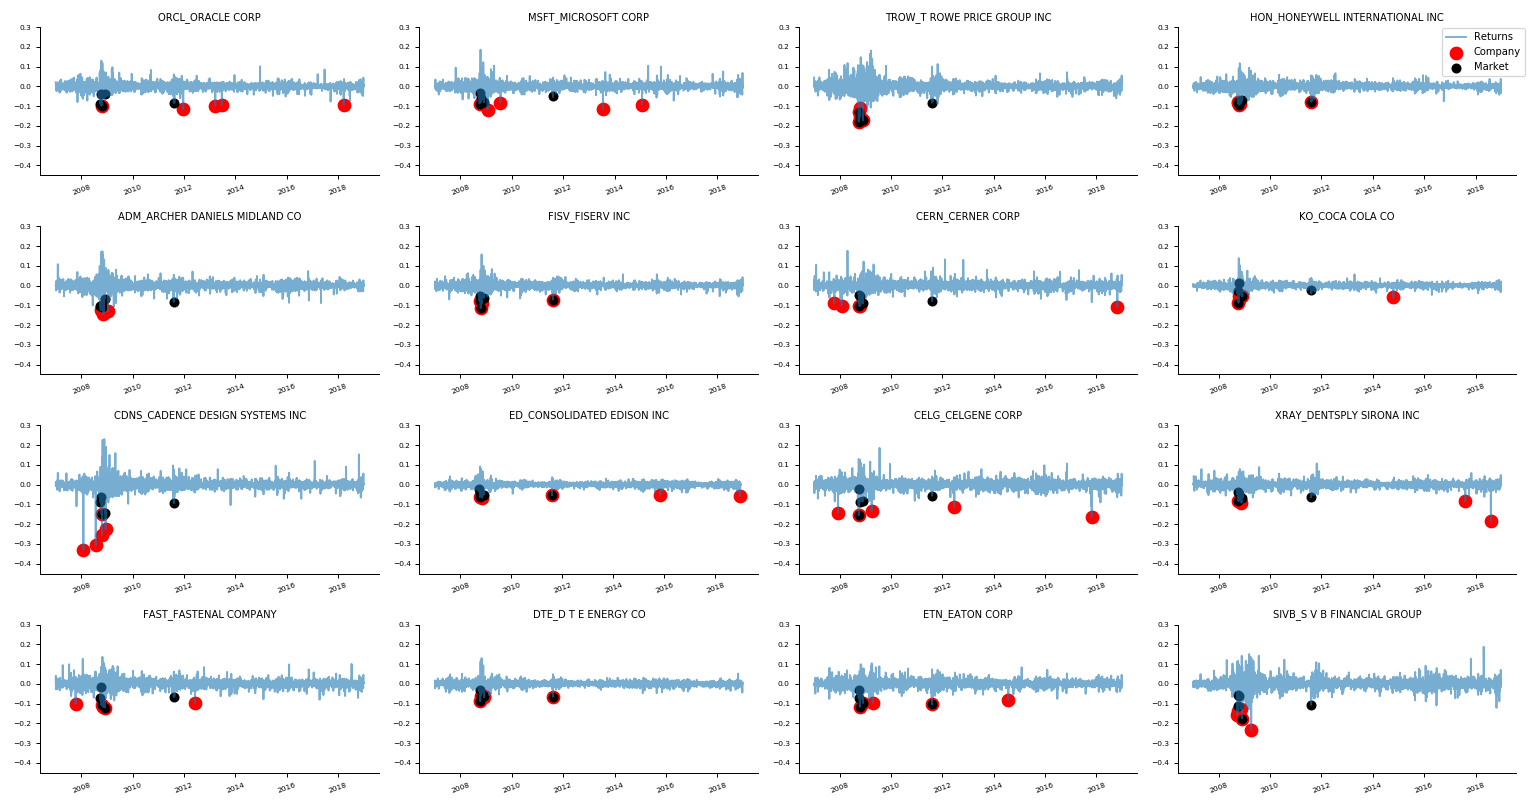

C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:74: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.










Batch 1


<IPython.core.display.Javascript object>


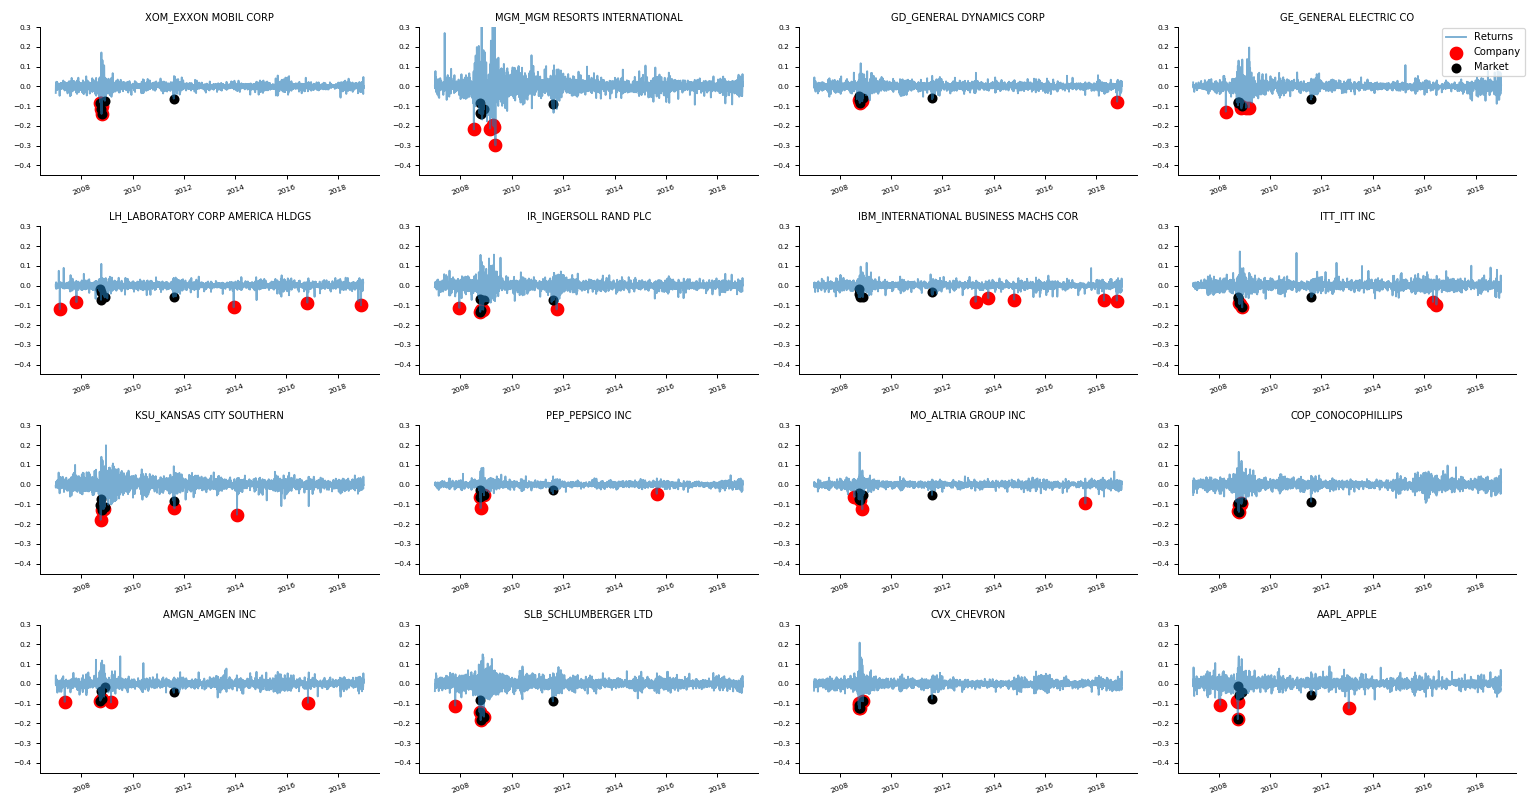









Batch 2


<IPython.core.display.Javascript object>


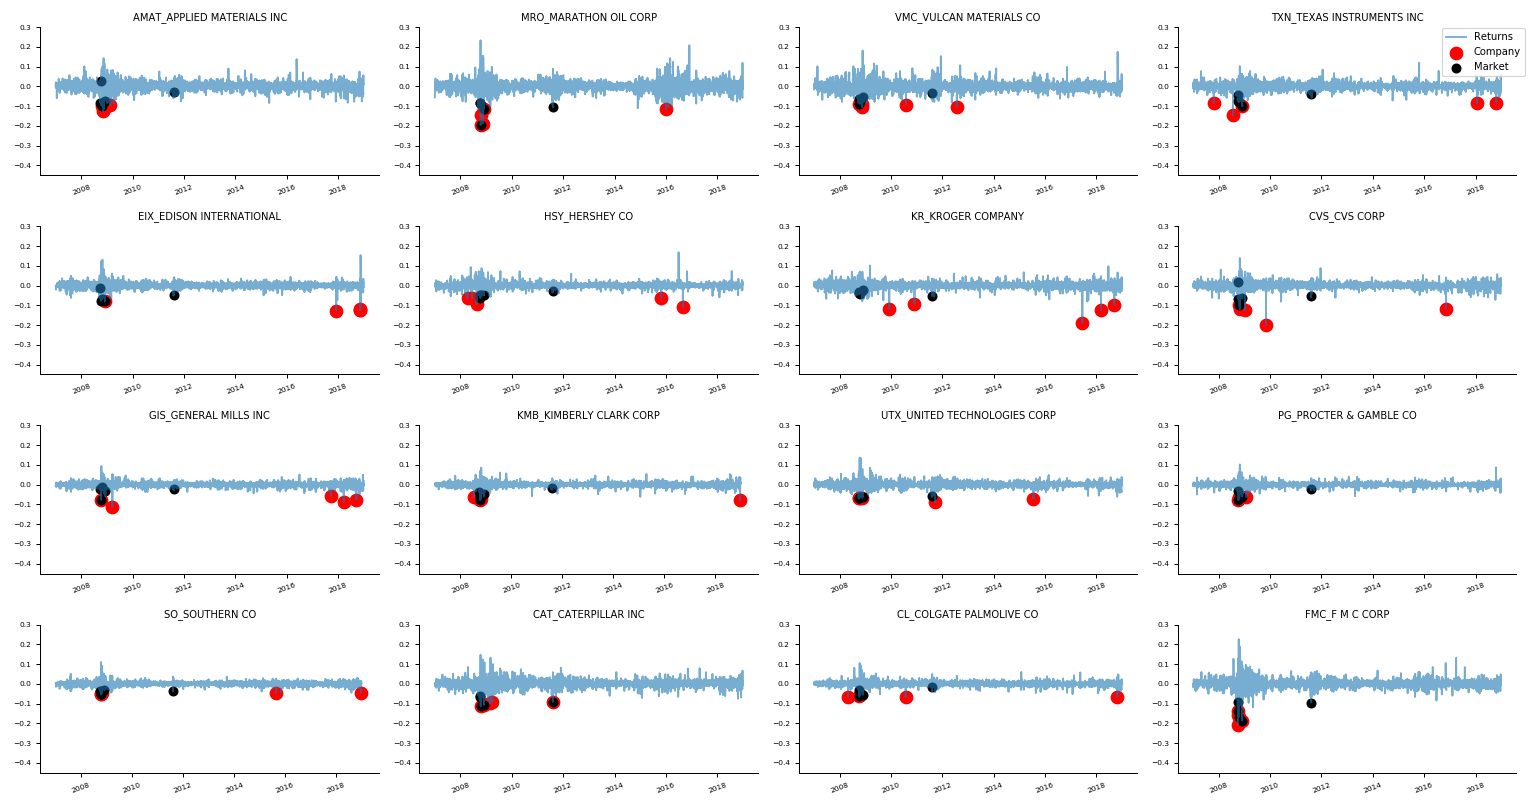









Batch 3


<IPython.core.display.Javascript object>


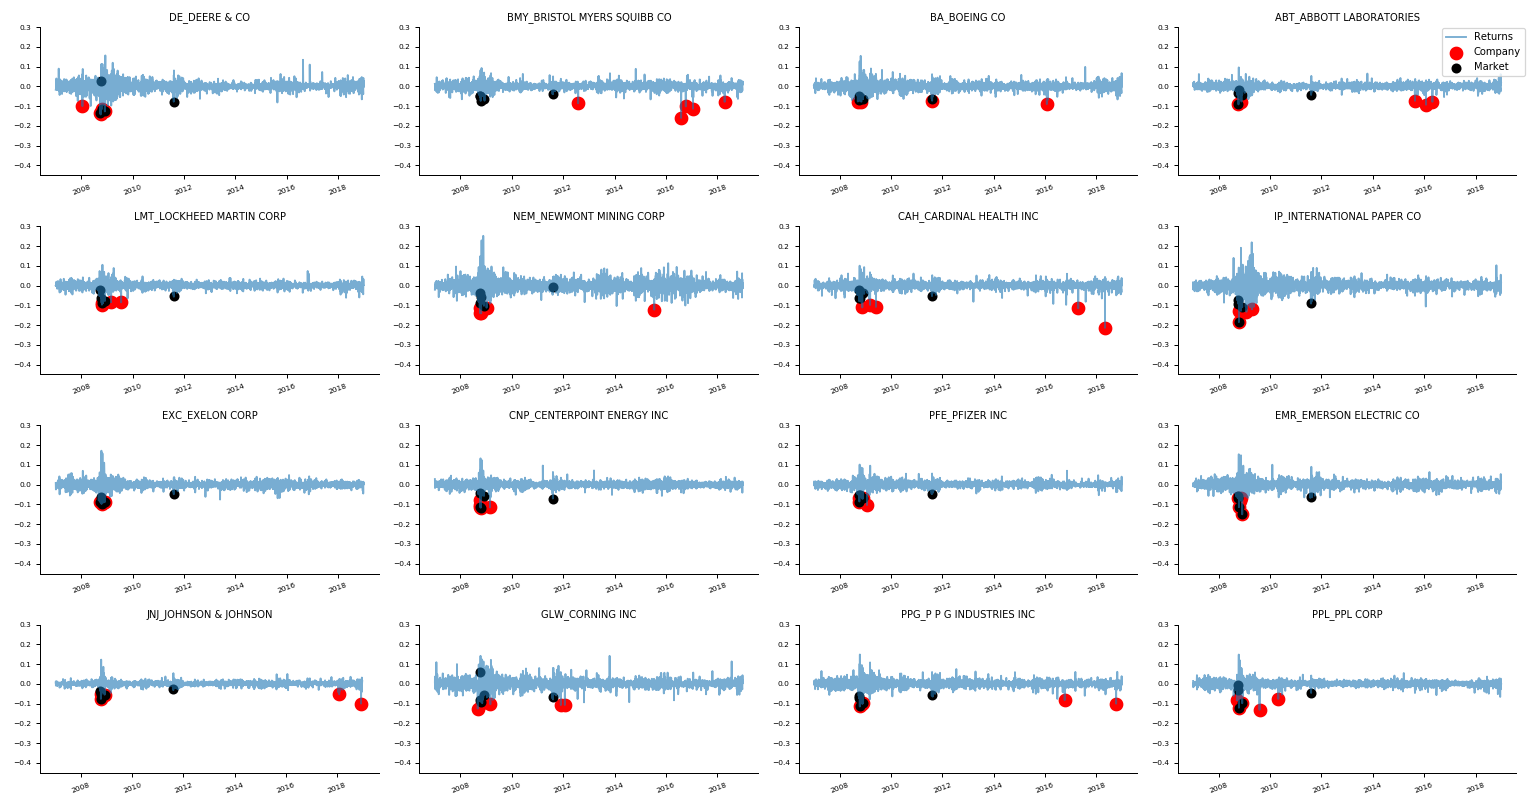









Batch 4


<IPython.core.display.Javascript object>


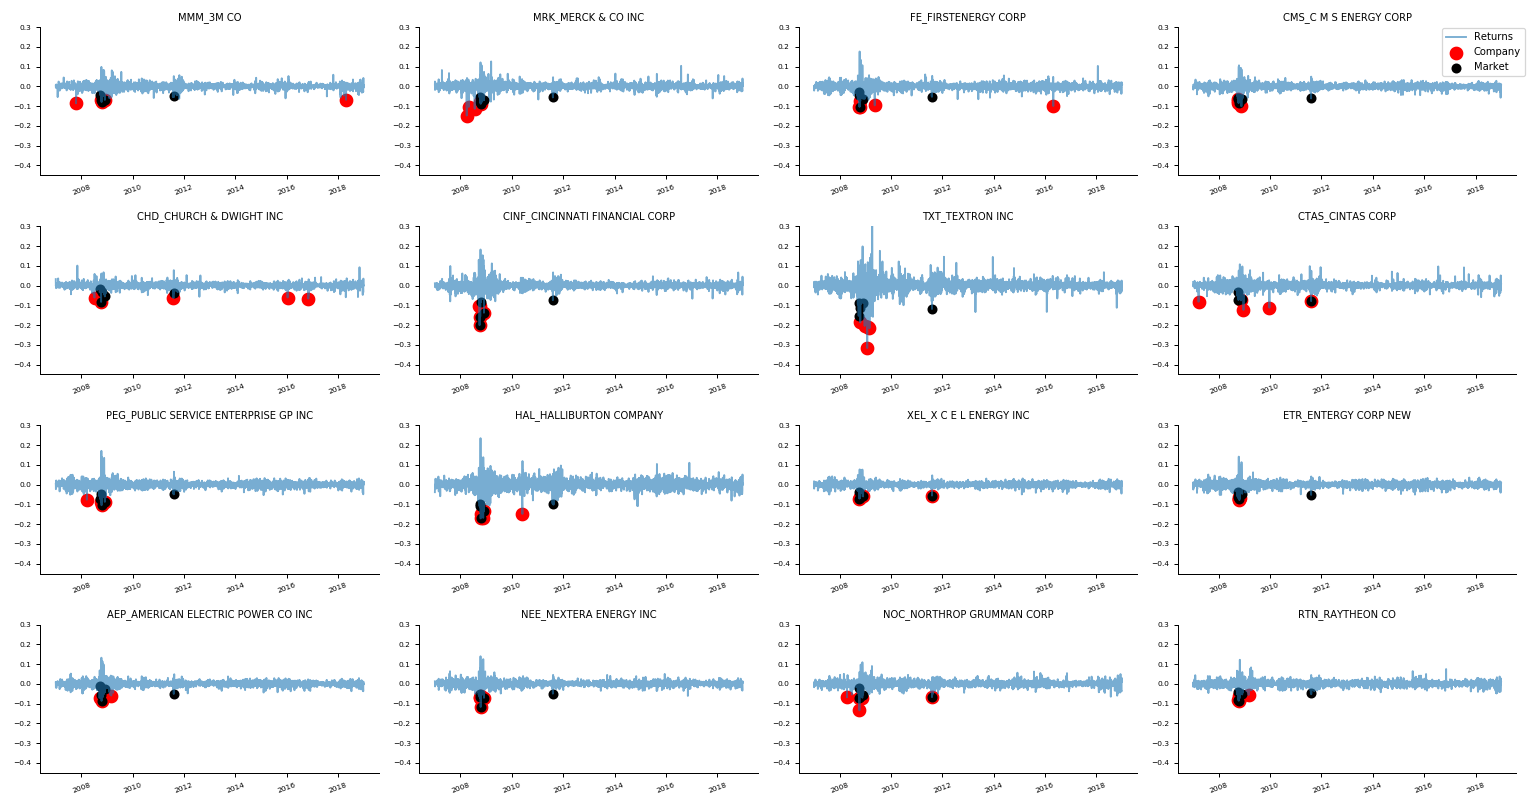









Batch 5


<IPython.core.display.Javascript object>


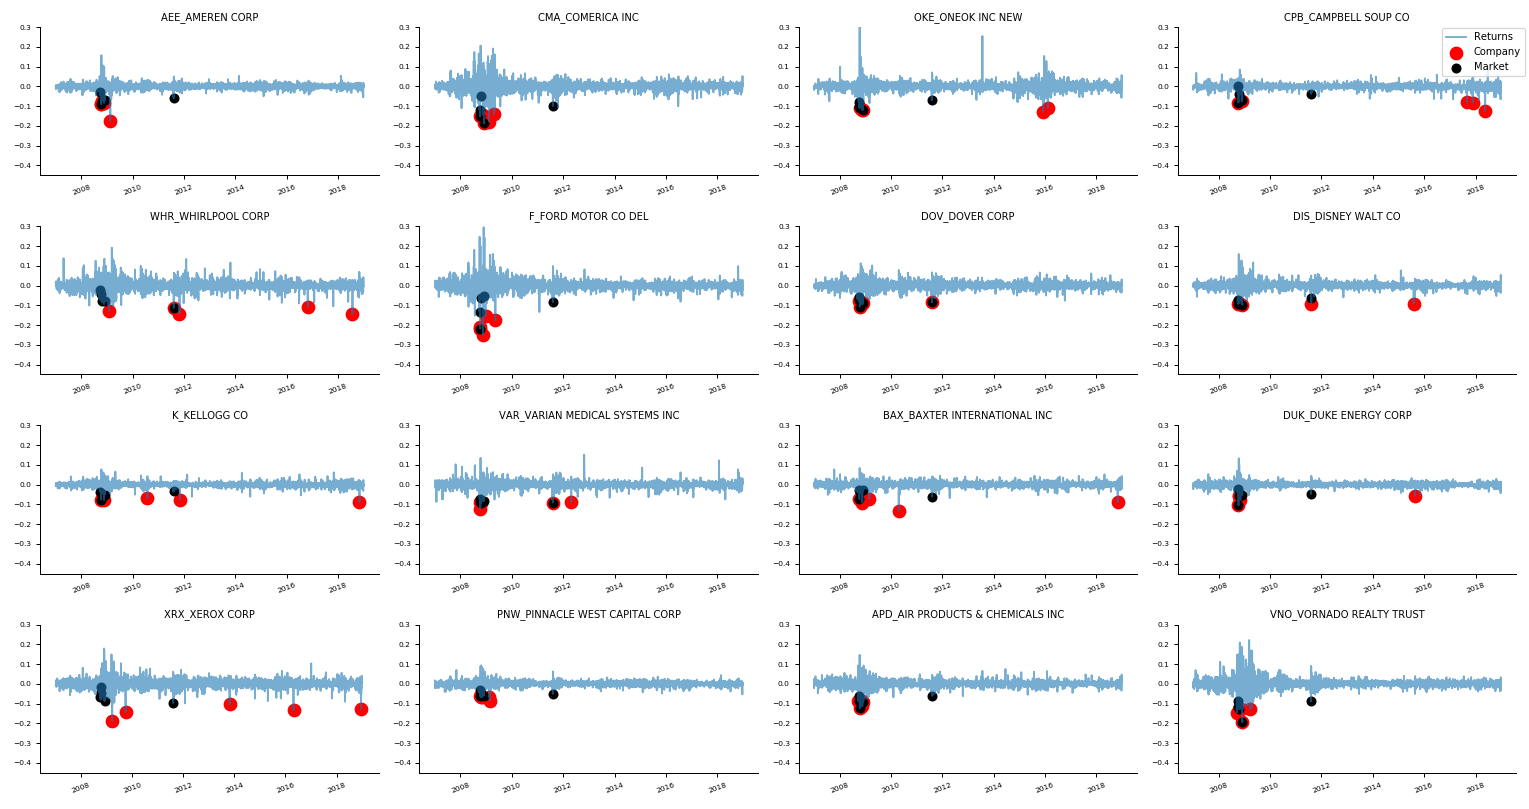









Batch 6


<IPython.core.display.Javascript object>


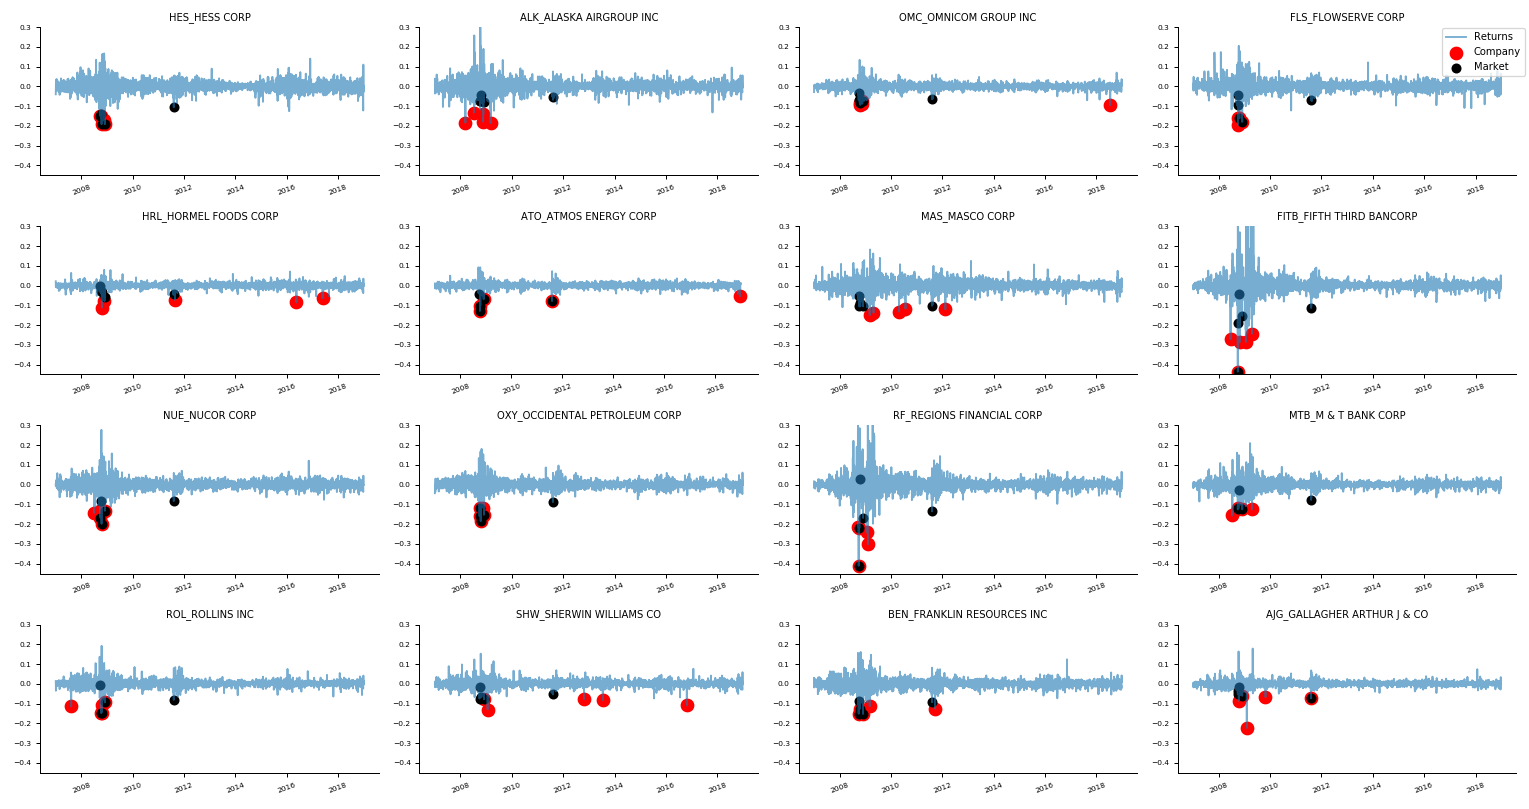









Batch 7


<IPython.core.display.Javascript object>


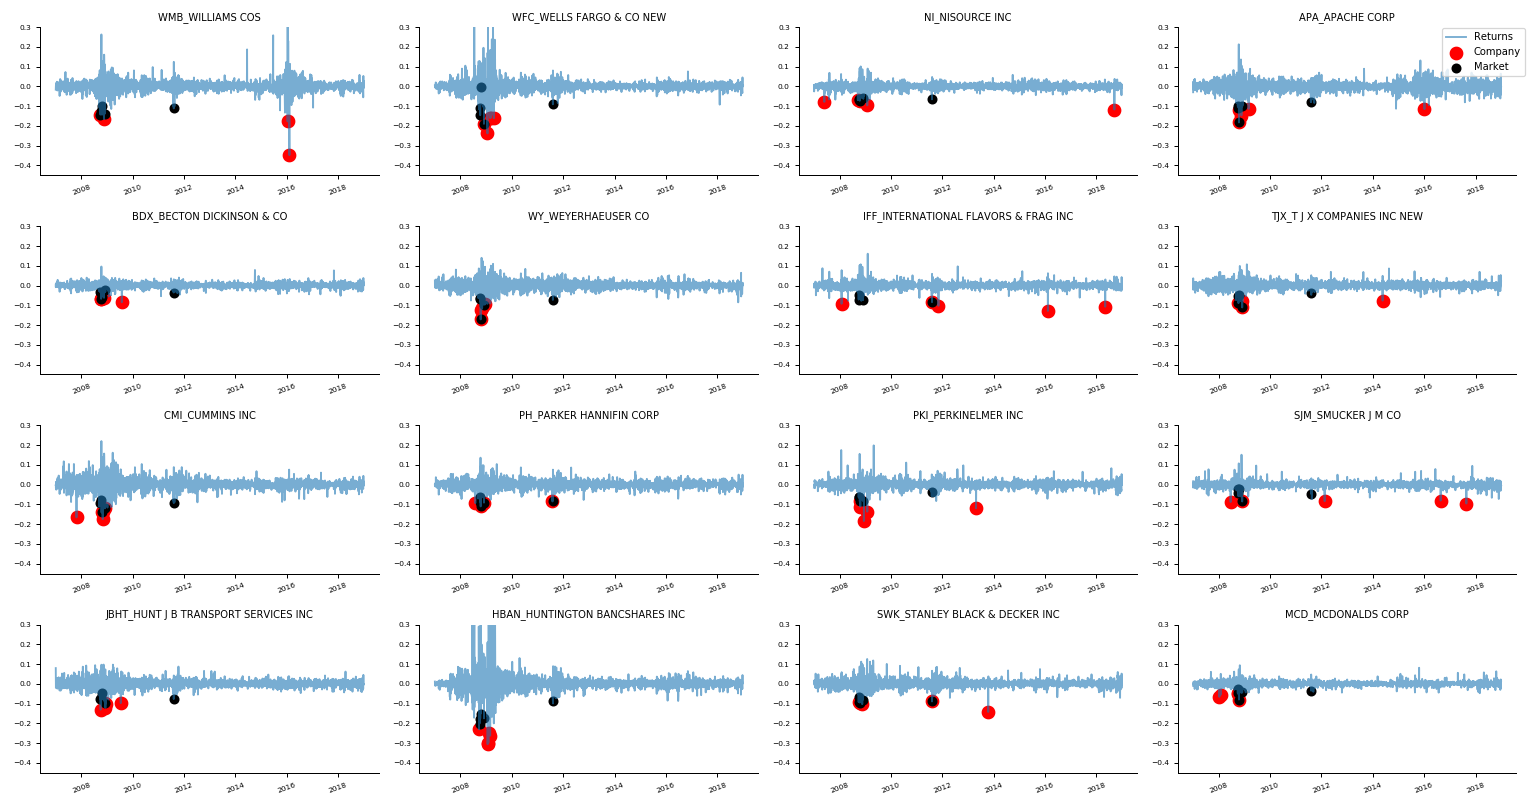









Batch 8


<IPython.core.display.Javascript object>


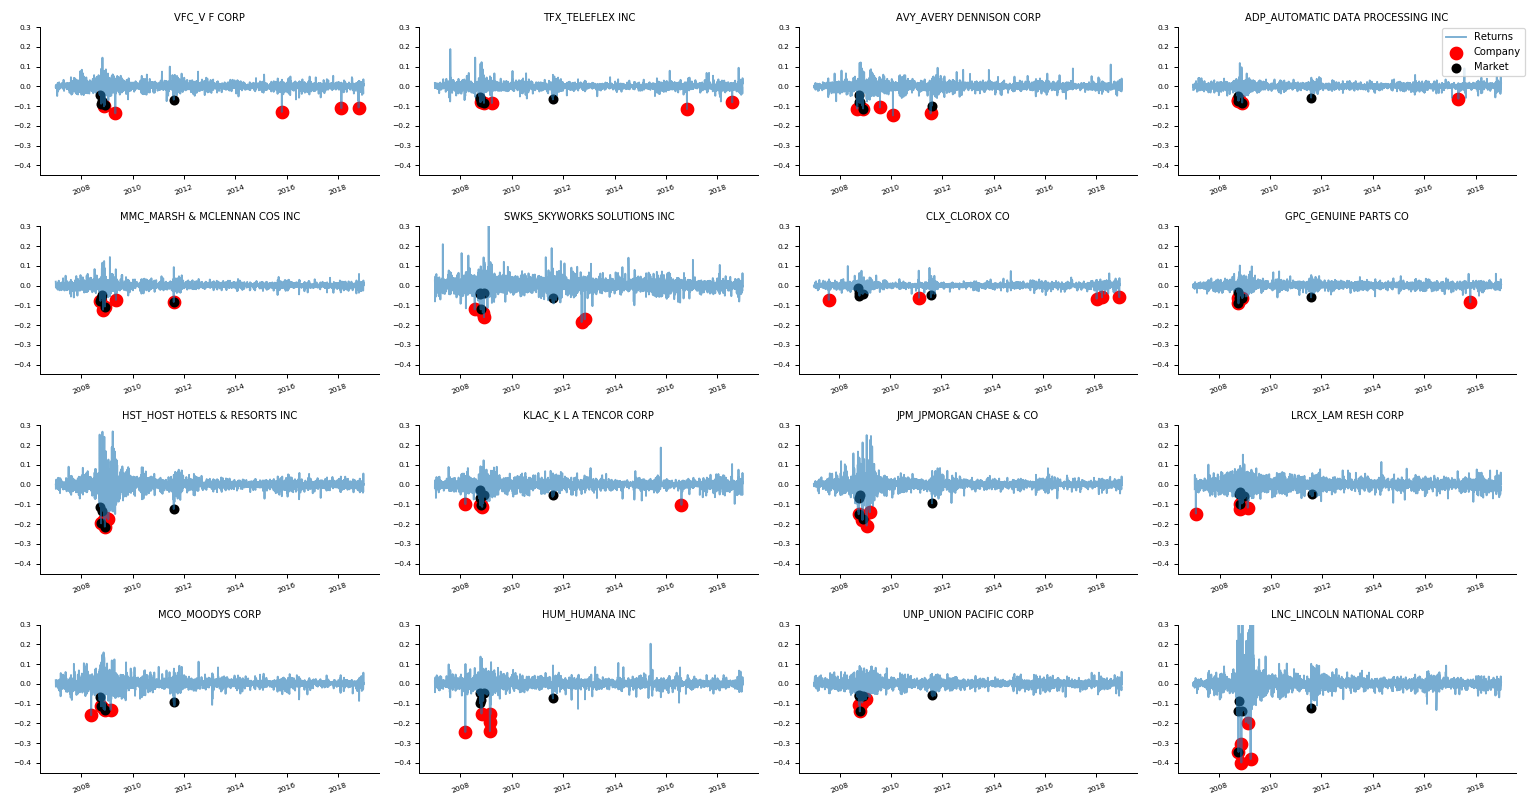









Batch 9


<IPython.core.display.Javascript object>


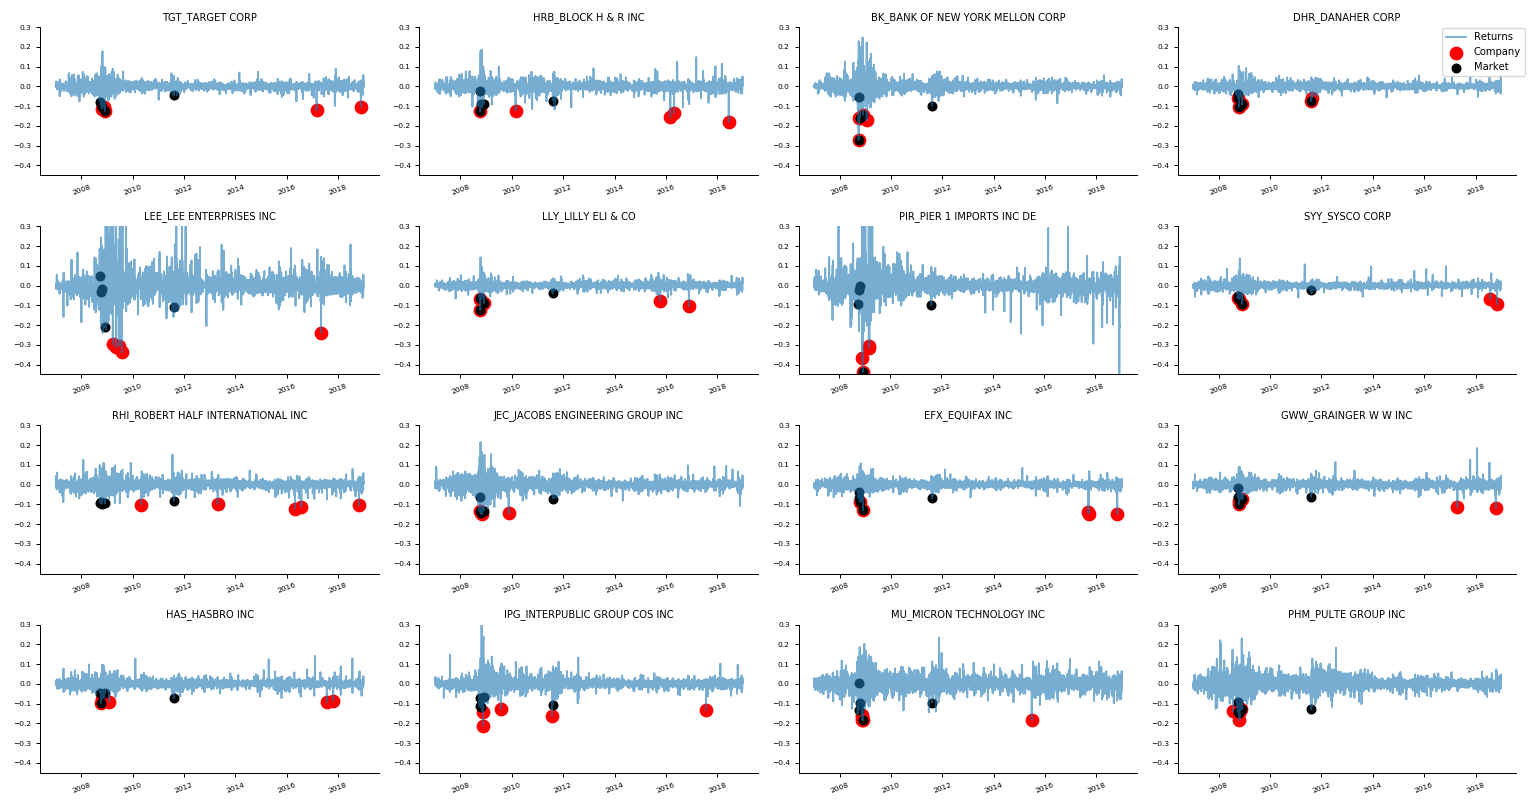









Batch 10


<IPython.core.display.Javascript object>


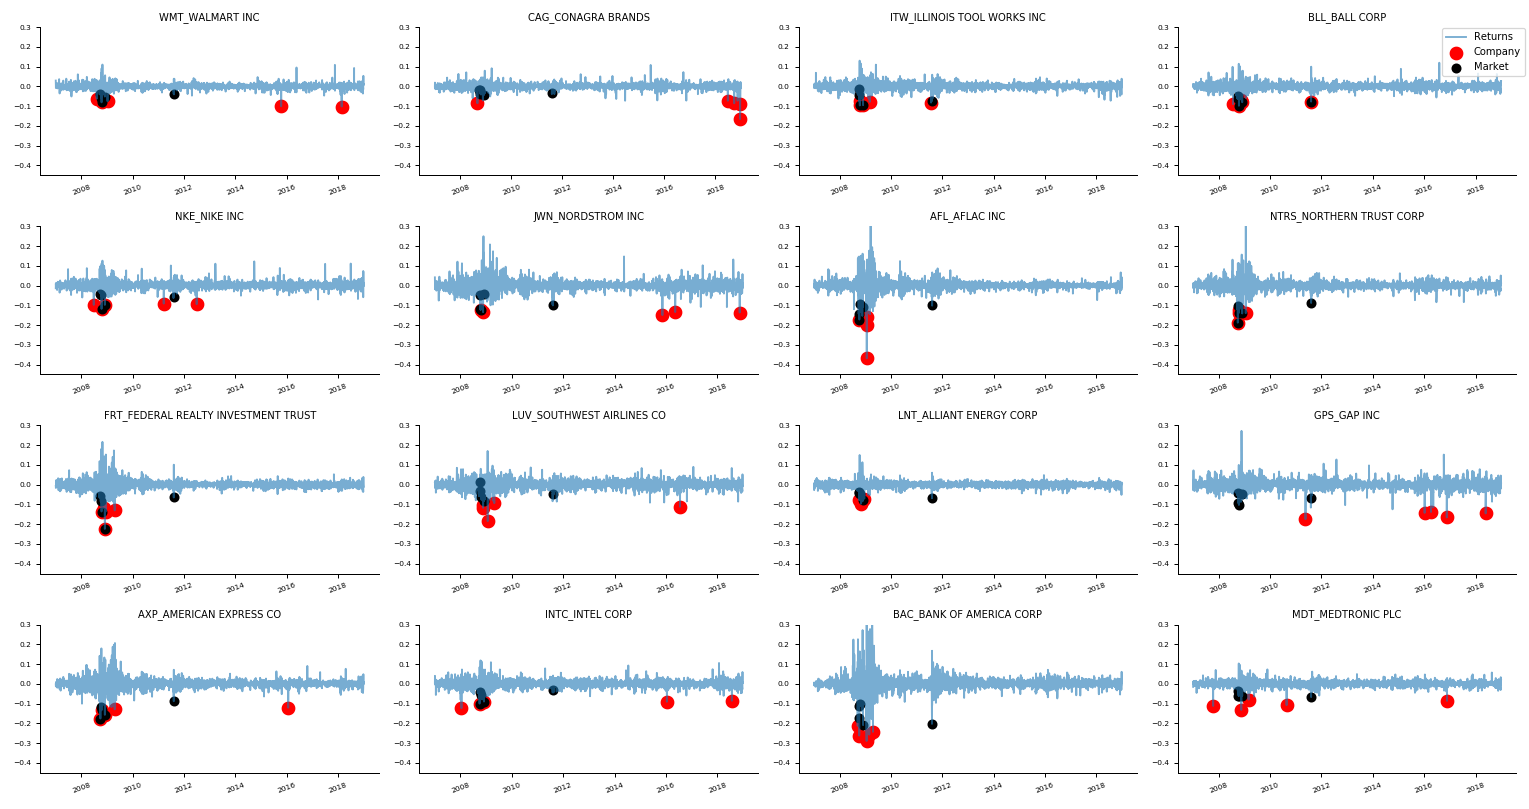









Batch 11


<IPython.core.display.Javascript object>


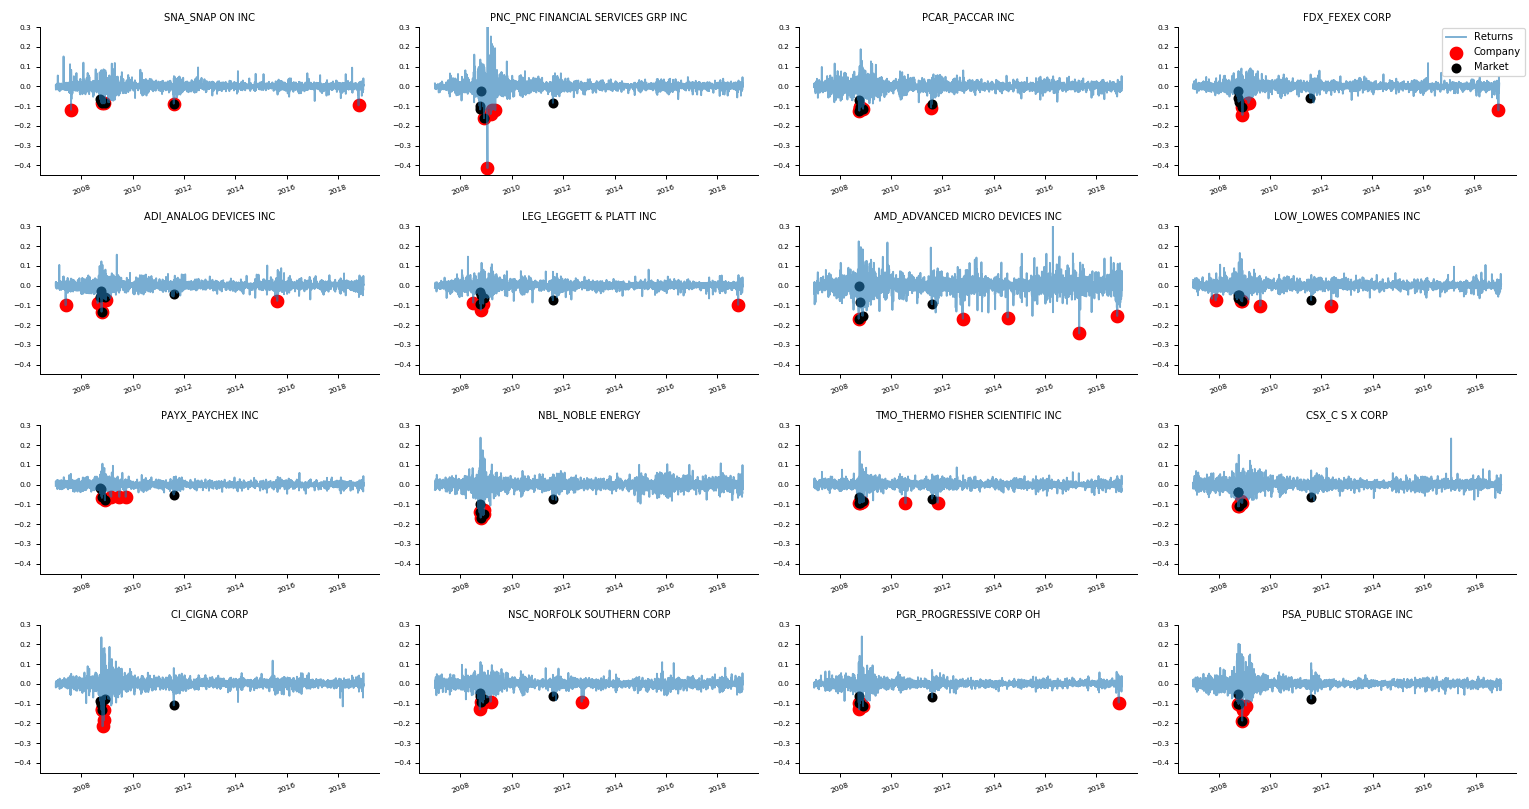









Batch 12


<IPython.core.display.Javascript object>


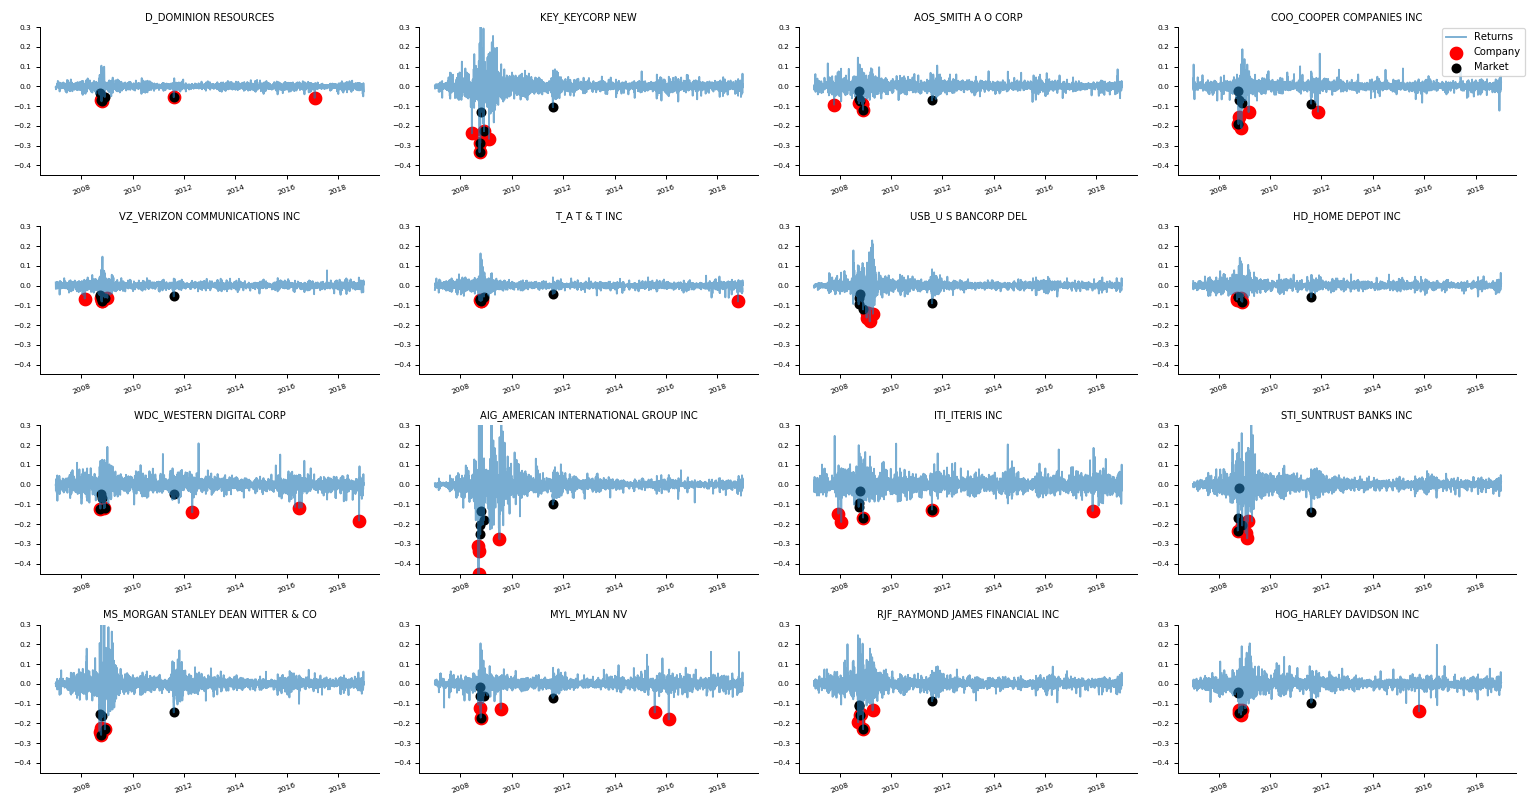









Batch 13


<IPython.core.display.Javascript object>


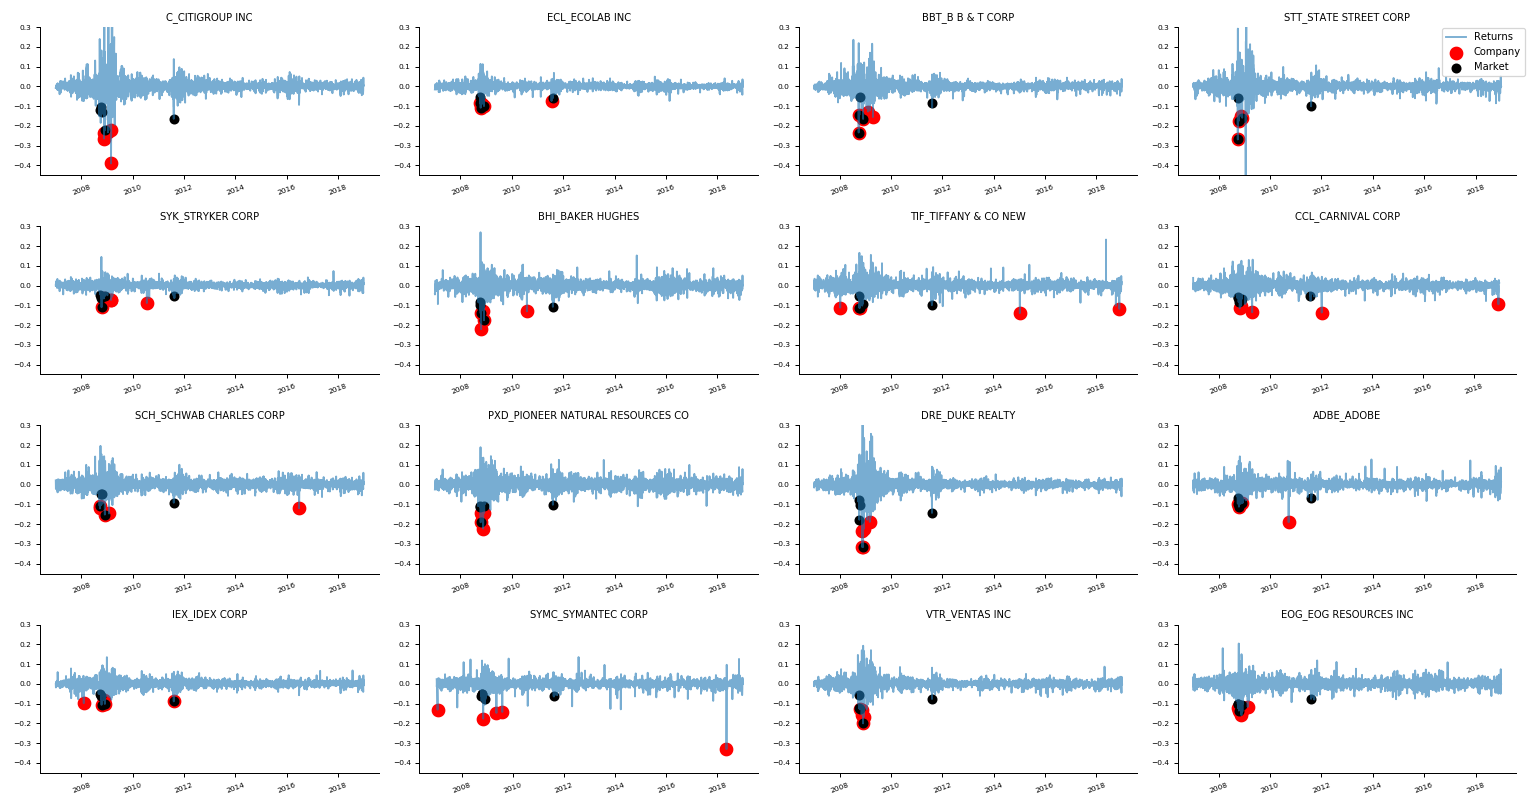









Batch 14


<IPython.core.display.Javascript object>


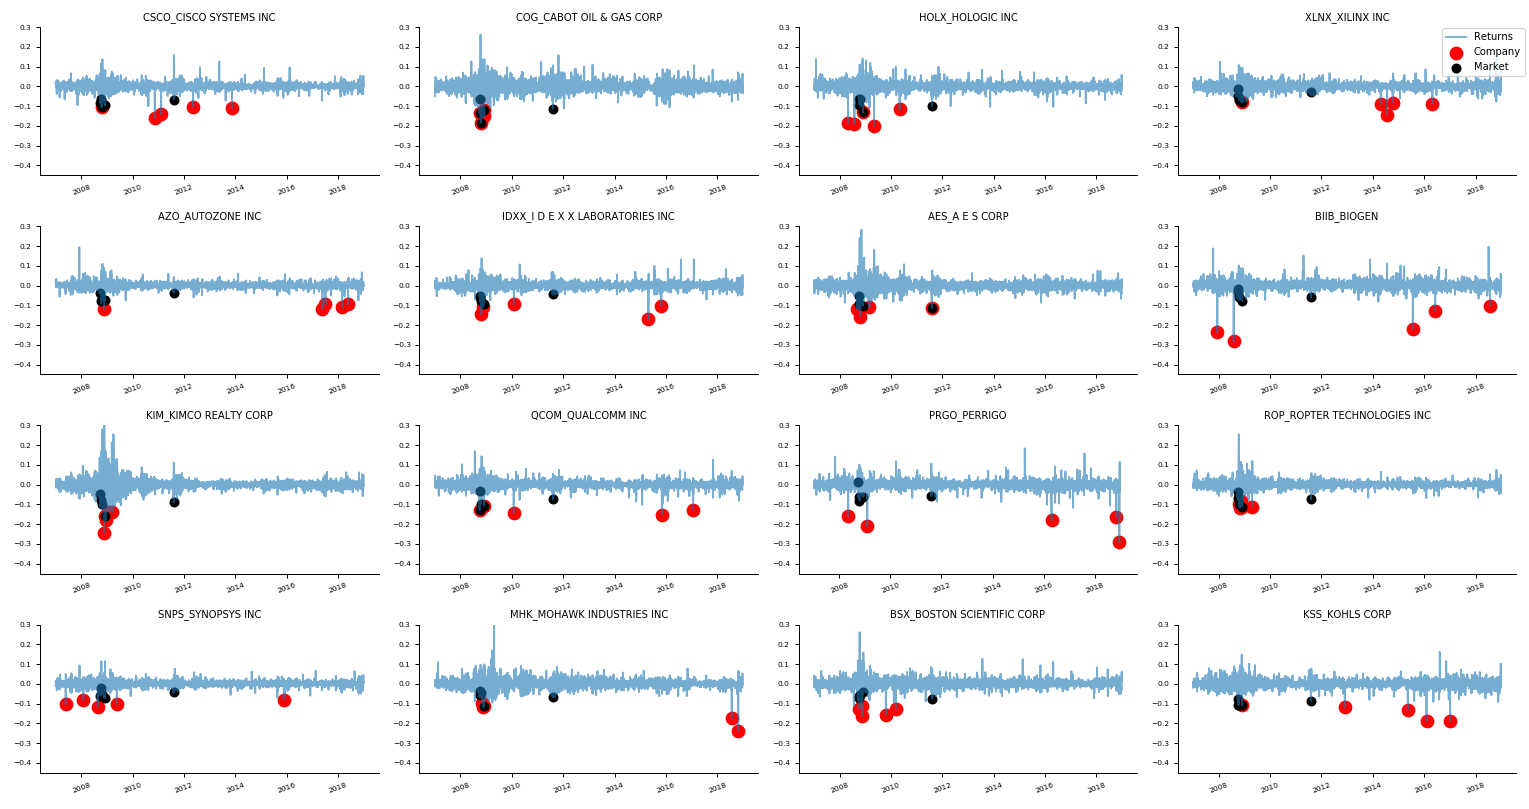









Batch 15


<IPython.core.display.Javascript object>


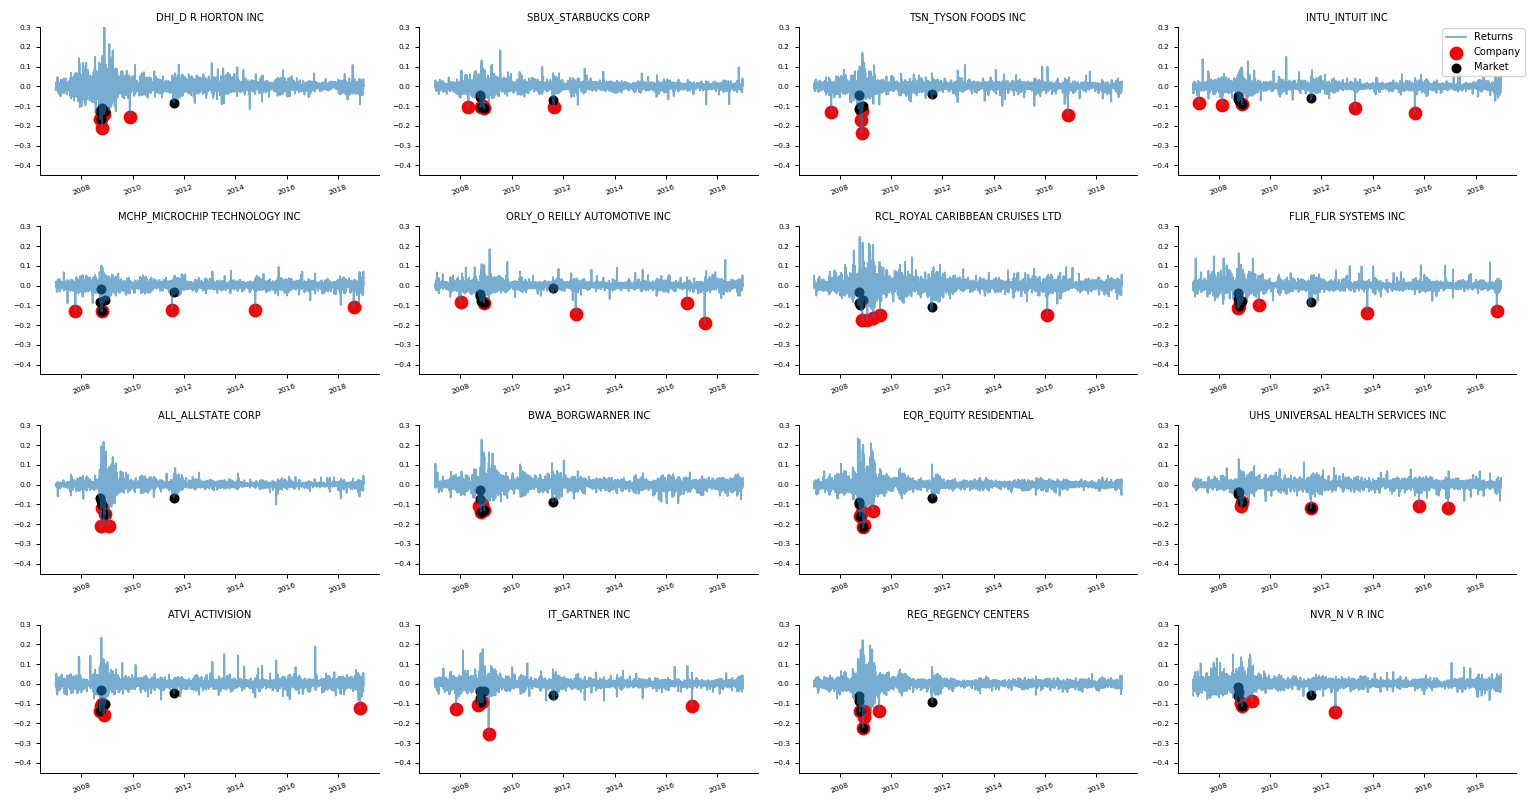









Batch 16


<IPython.core.display.Javascript object>


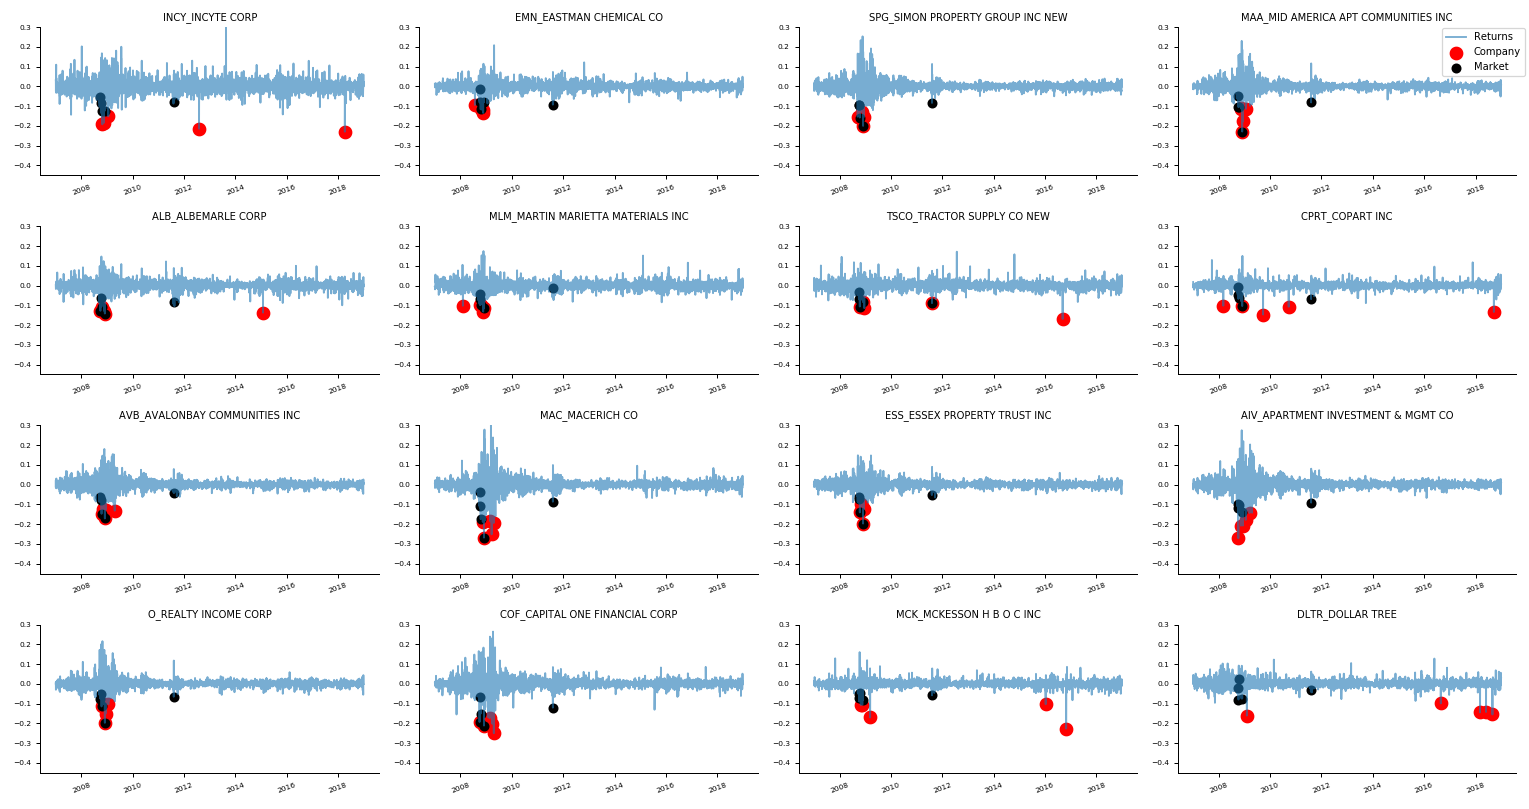









Batch 17


<IPython.core.display.Javascript object>


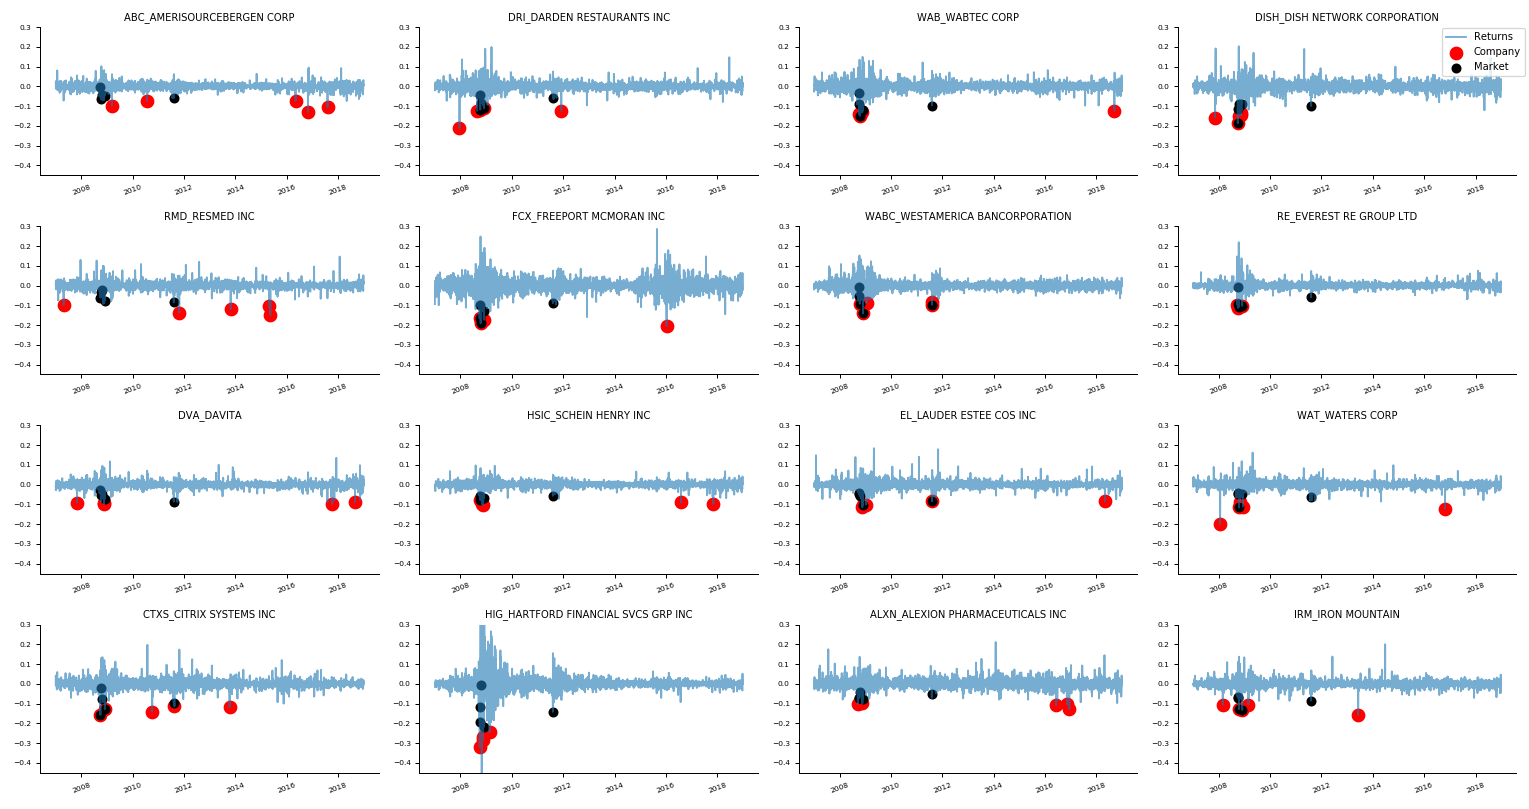









Batch 18


<IPython.core.display.Javascript object>


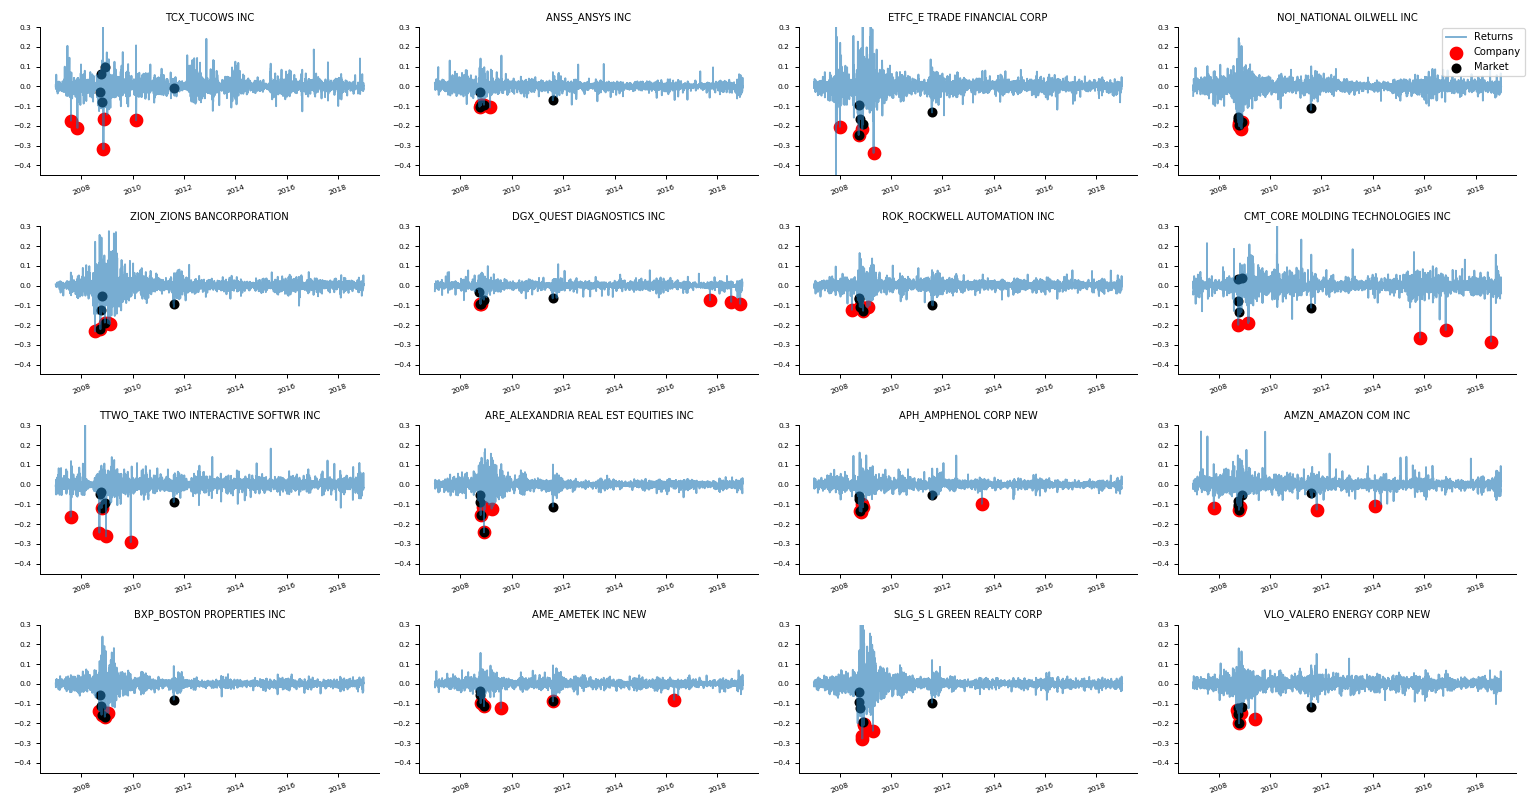









Batch 19


<IPython.core.display.Javascript object>


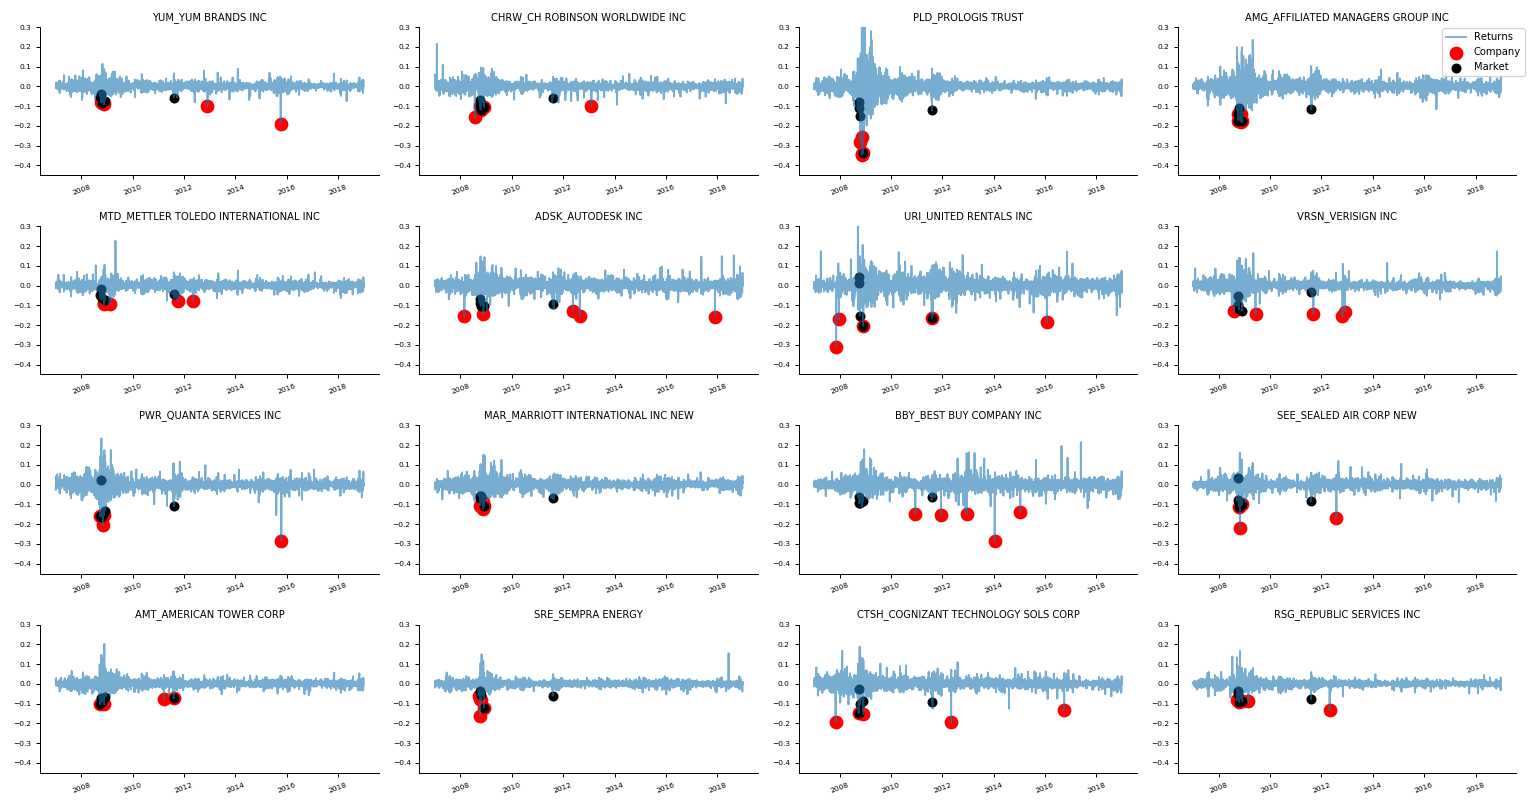









Batch 20


C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


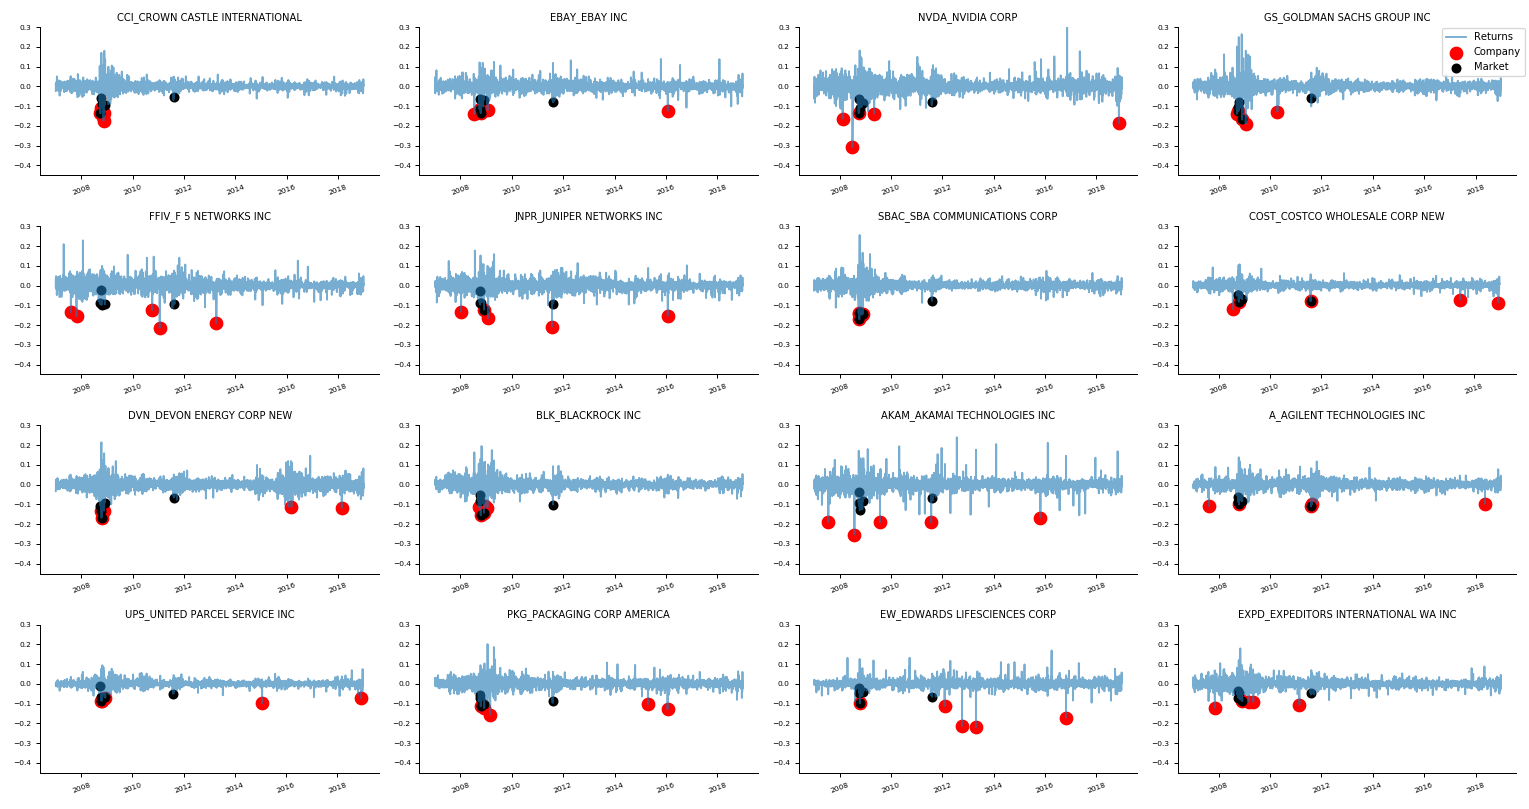









Batch 21


<IPython.core.display.Javascript object>


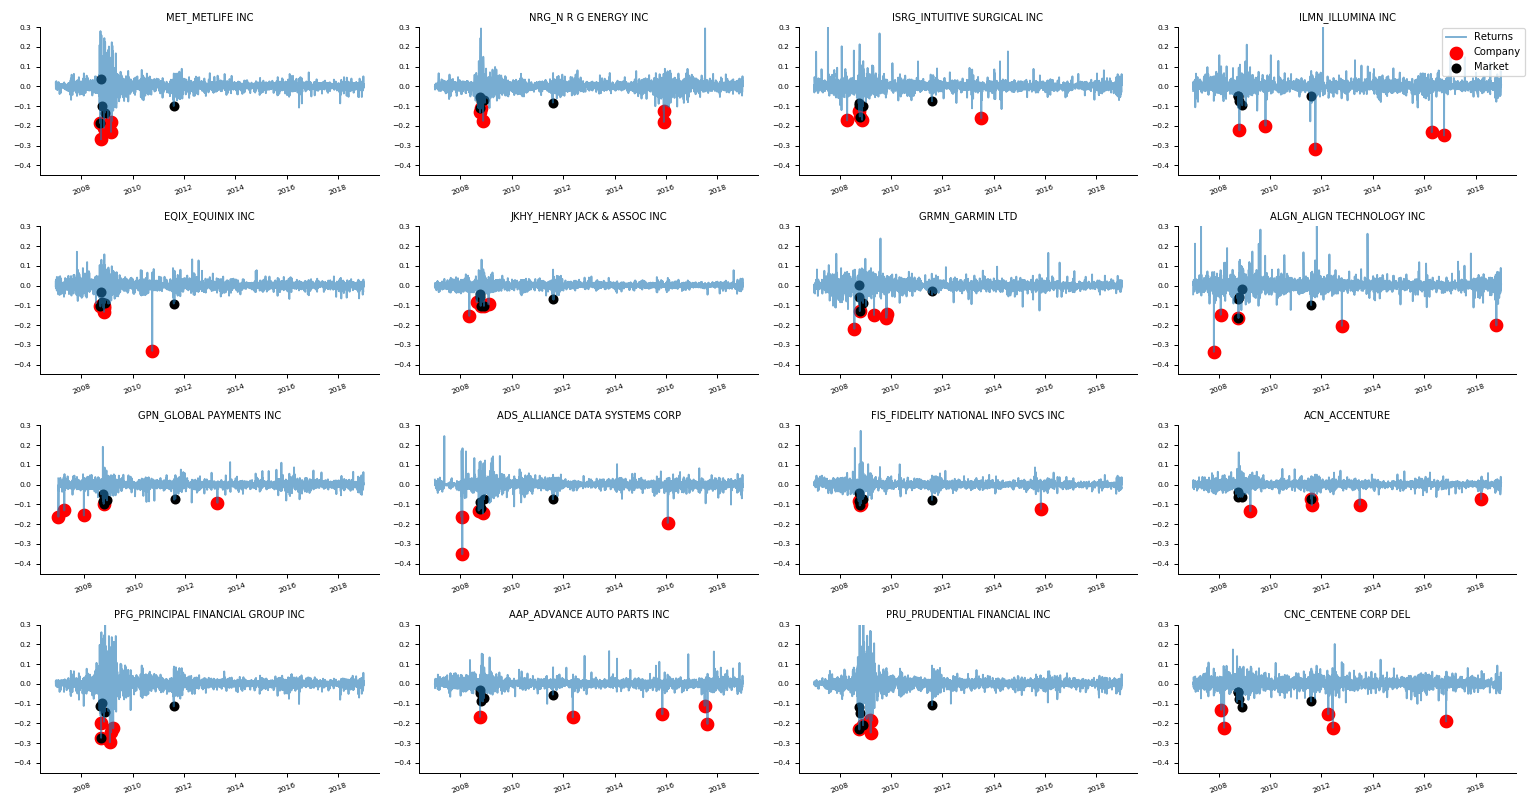









Batch 22


<IPython.core.display.Javascript object>


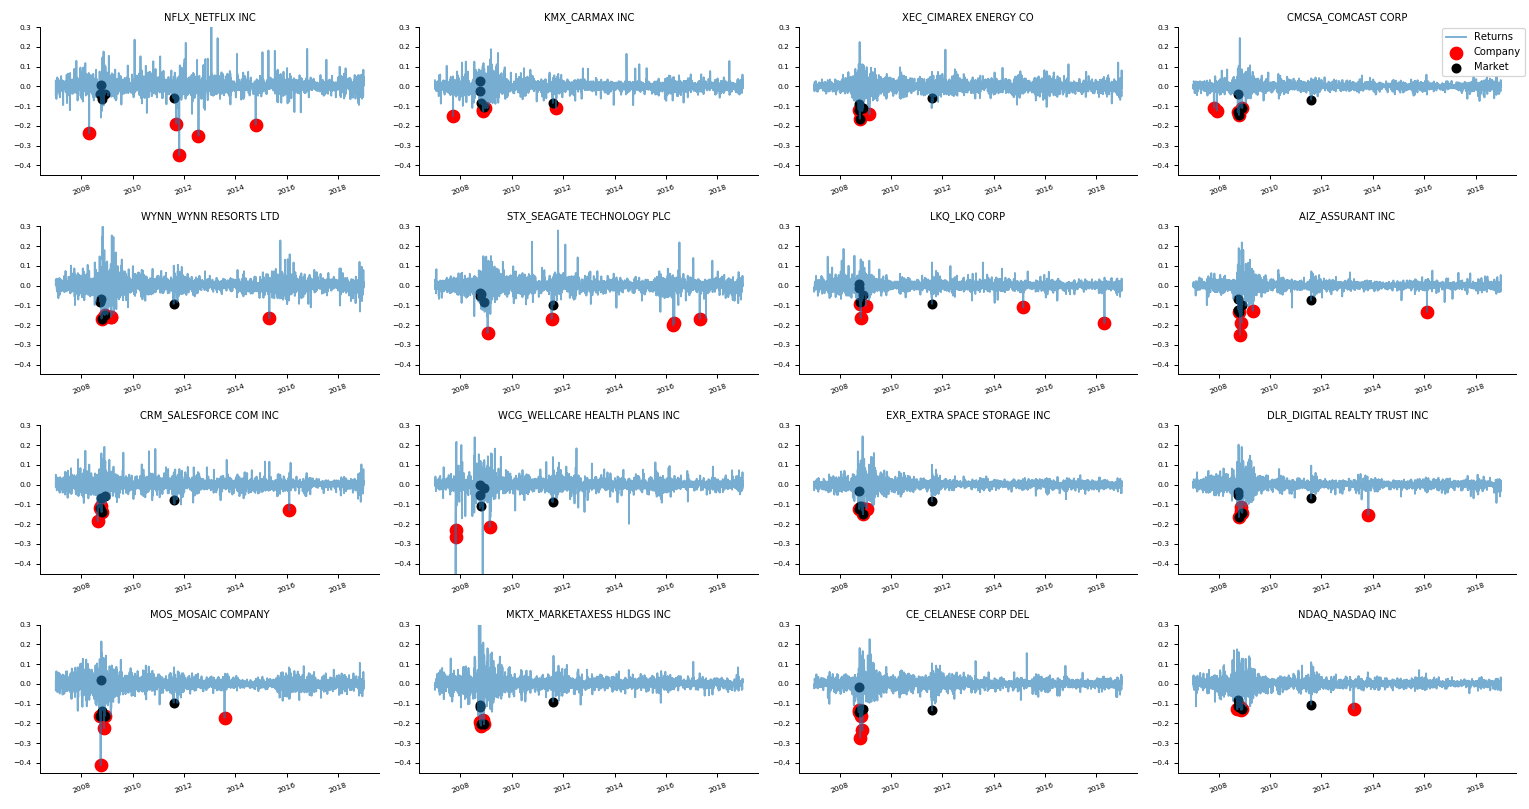









Batch 23


<IPython.core.display.Javascript object>


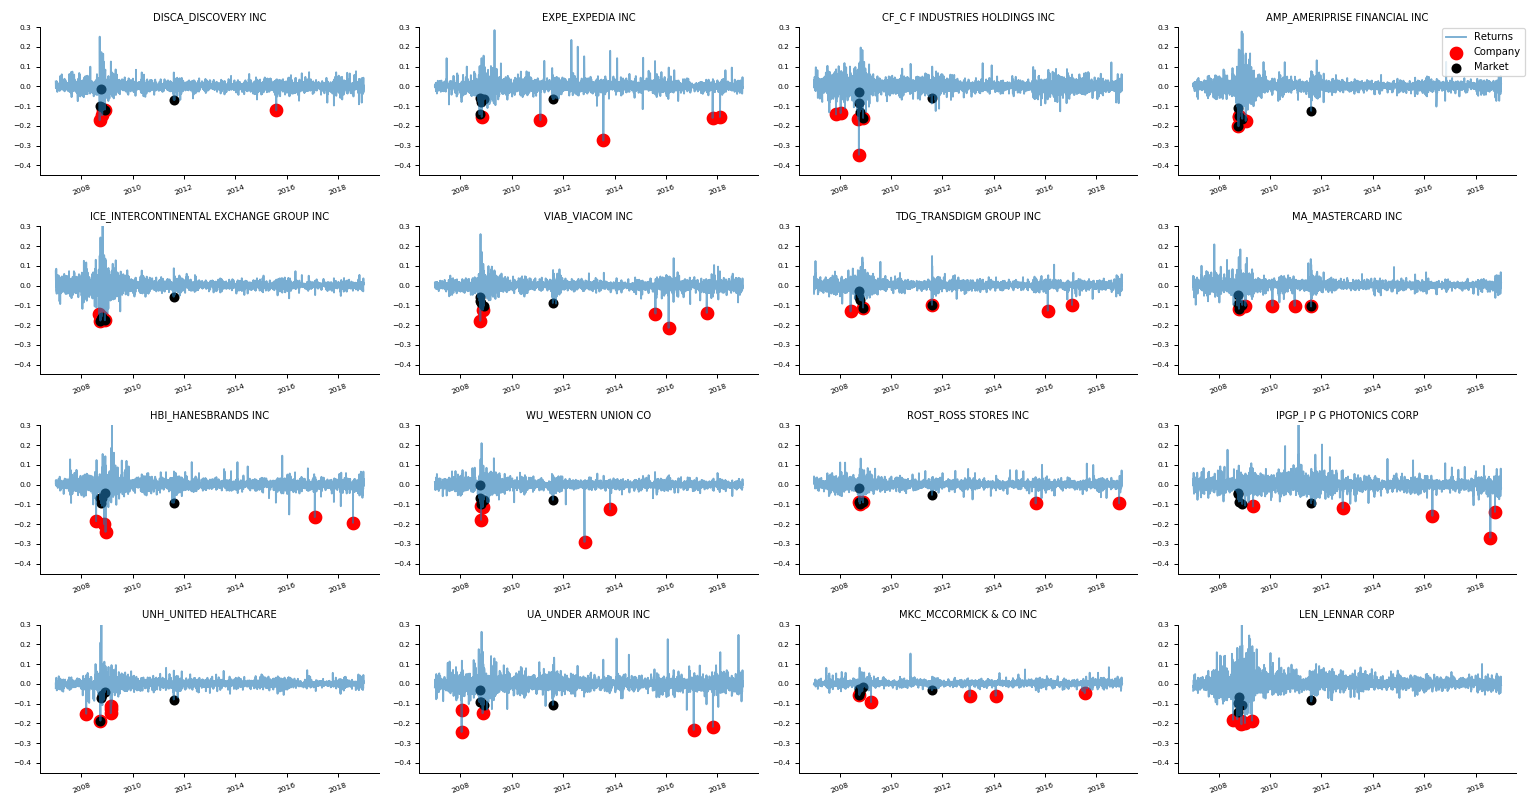

In [22]:
#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20
black_dot = 2
red_dot = 5

### matrix of subplots
n_cols = 4
n_rows = 4
n_plots = n_cols*n_rows
nloops = int(np.floor(388/n_plots))
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_returns.columns)
    lower = i*n_plots
    upper = (i+1)*n_plots
    #print(lower, upper)
    temp_list = df_returns.columns[lower:upper]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    ### legend labels
    dot_labels = ['Returns', 'Company', 'Market']
    temp_list_of_axis = []
    
    ### instantiage
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company returns, worst 5 dates with worst returns
            temp_worst_returns = worst_returns_dic[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            temp_worst_returns_sys = worst_returns_sys_dic[symbol]


            ### PLOT: 5 worst company dates
            wc = ax[k, l].scatter(temp_worst_returns.index, temp_worst_returns.values, 
                       color='red', 
                       linewidths=red_dot, 
                       edgecolor='red') 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            wm = ax[k,l].scatter(temp_worst_returns_sys.index, temp_worst_returns_sys.values, 
                       color='black', 
                       linewidths=black_dot, 
                       edgecolor='black') 
                       #label='Worst Market Trading Days')            
            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df_returns[symbol].values, label='Daily Returns'.format(symbol), alpha=0.6)


            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            ax[k,l].set_ylim([-0.45, 0.45])            
            temp_list_of_axis.append([wc, wm, wt])
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
               #title='Worst Trading Days', title_fontsize=25, 
               bbox_to_anchor=(1.0, 0.97), 
               prop={'size':legend_font})#, fontsize=sup_title_font)
    leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    #break
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
        
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.

## WHAT ARE THE LEFT OVER PLOTS?

In [16]:
388-(16*24)

4

In [17]:
final_temp_list = df_returns.columns[-4:]
final_temp_list

Index(['TAP_MOLSON COORS BREWING CO', 'STZ_CONSTELLATION BRANDS INC',
       'CBS_CBS CORP', 'CMG_CHIPOTLE MEXICAN GRILL INC'],
      dtype='object', name='date')

### generate the rest of the leftover plots









Batch 0


C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:25: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


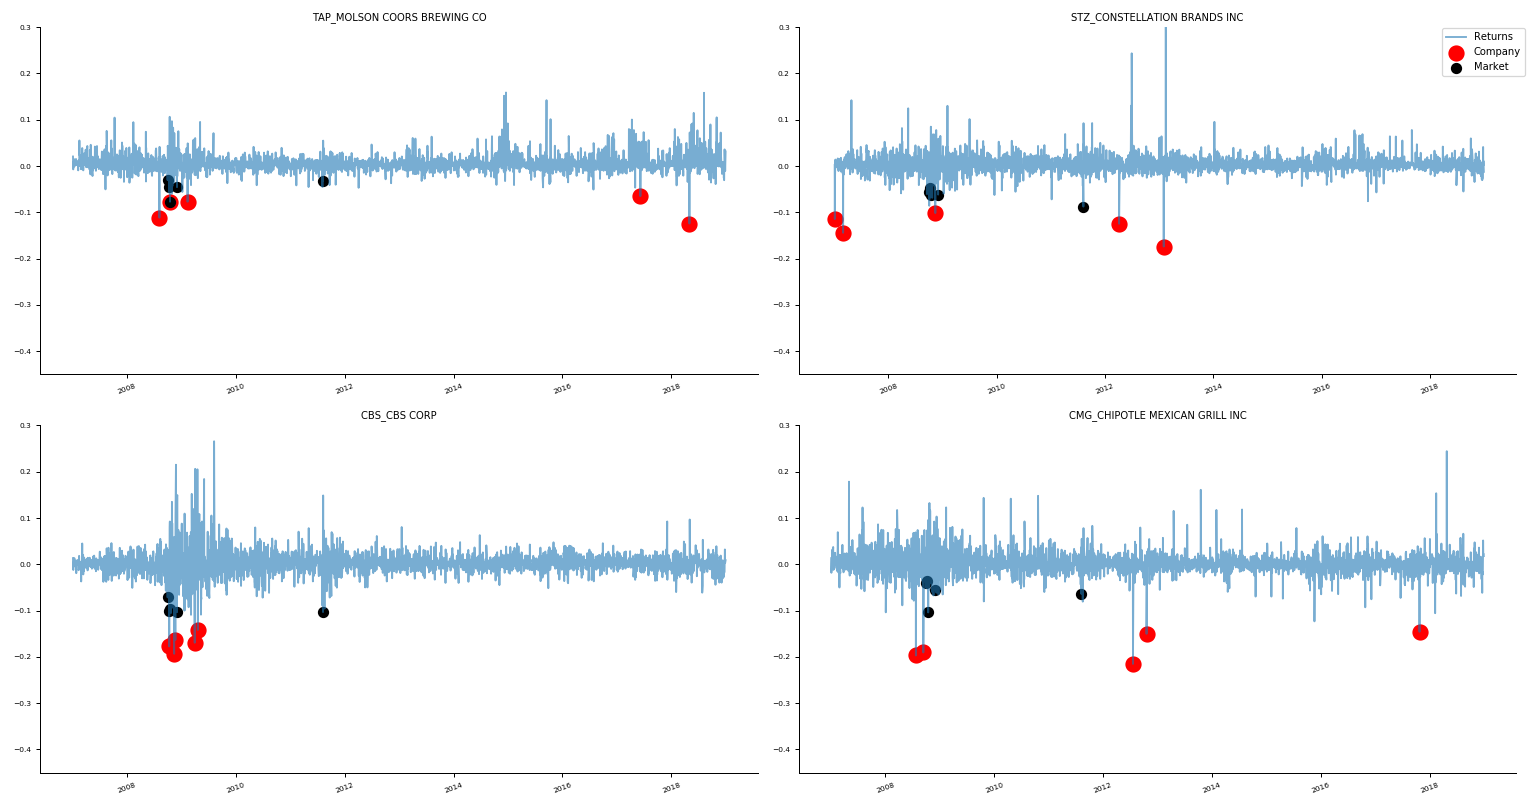

C:\PROGRA1\Anaconda3\lib\site-packages\ipykernel\__main__.py:70: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


In [23]:
#sup_title_font =15
sub_title_font =8
legend_font =8
axis_font = 6
tick_rotation = 20

### matrix of subplots
n_cols = 2
n_rows = 2
n_plots = n_cols*n_rows
nloops = 1
temp_matrix = np.array(range(n_plots)).reshape(n_rows,n_cols)

for i in range(nloops):
    nn = len(df_returns.columns)
    #print(lower, upper)
    temp_list = df_returns.columns[-n_plots:]
    print('\n\n\n\n\n\n\n\nBatch {}'.format(i))
    
    
    ####----PLOT THE FIGURES---------#####
    dot_labels = ['Returns', 'Company', 'Market']
    temp_list_of_axis = []
    
    fig, ax = plt.subplots(n_cols,n_rows,figsize=(17,9))
    for k in range(n_rows):
        for l in range(n_cols):
            ## indices
            temp_idx = temp_matrix[k,l]
            symbol = temp_list[temp_idx]
            ### company returns, worst 5 dates with worst returns
            temp_worst_returns = worst_returns_dic[symbol]
            ### comapny returns, worst 5 systemic dates with worst returns
            temp_worst_returns_sys = worst_returns_sys_dic[symbol]
            
            ### Company Timeseries            
            wt = ax[k, l].plot(dates, df_returns[symbol].values, label='Daily Returns'.format(symbol), alpha=0.6)

            ### PLOT: 5 worst company dates
            wc = ax[k, l].scatter(temp_worst_returns.index, temp_worst_returns.values, 
                       color='red', 
                       linewidths=7, 
                       edgecolor='red', zorder=1) 
                       #label='Worst Company Trading')
            ### PLOT: Returns on 5 worst systemic dates 
            wm = ax[k,l].scatter(temp_worst_returns_sys.index, temp_worst_returns_sys.values, 
                       color='black', 
                       linewidths=3, 
                       edgecolor='black', zorder=1) 
                       #label='Worst Market Trading Days')            


            ax[k,l].spines['top'].set_visible(False)
            ax[k,l].spines['right'].set_visible(False)
            ax[k,l].set_title(symbol, fontsize=sub_title_font) 
            #ax[k,l].set_xlabel(fontsize=x_axis_font)
            ax[k,l].tick_params(axis="x", labelsize=axis_font, rotation=tick_rotation)
            ax[k,l].set_ylim([-0.45, 0.3])
            ax[k,l].tick_params(axis="y", labelsize=axis_font)
            temp_list_of_axis.append([wt, wc, wm])
         
            
            
    #fig.legend(bbox_to_anchor=(1.1, 1.1), prop={'size':15})
    #fig.suptitle('Daily Returns 2007-2018:\nBatch {}'.format(i), fontsize=sup_title_font)
    fig.subplots_adjust(hspace=0.7)
    leg = fig.legend(temp_list_of_axis, labels=dot_labels, 
               #title='Worst Trading Days', title_fontsize=25, 
               bbox_to_anchor=(1.0, 0.97), 
               prop={'size':legend_font})#, fontsize=sup_title_font)
    leg.set_in_layout(False)
    #plt.tight_layout(pad=0.5, w_pad=5.0, h_pad=0.0)
    plt.tight_layout()
    plt.show()
    break
    #plt.savefig('plots\\timeseries\\price_timeseries_batch{}.png'.format(i+1), dpi=220) 
    
    
#             for tick in ax[k, l].get_xticklabels():
#                 tick.set_rotation(20)
#                 tick.

### QUESTION, WHICH COMPANIES CLUSTER AROUND SYSTEMICALLY POOR DATES? 
### WHICH COMPANIES HAVE THEIR WORST PERFORMANCES OUTSIDE OF THE SYSTEMICALLY POOR DATES?

In [19]:
# for key in worst_returns_dic.keys():
#     print(key)
#     break

In [20]:
# for idx, key in enumerate(worst_returns_dic.keys()):
#     print(idx, key)
#     if idx >5:
#         break